In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
# Este df será usado somente na seção 3. A partir da seção 4 ele será substituido pela amostra tratada.
df = pd.read_csv('.\\data\\microdados_enem_2019_sp.csv',
                 sep=';', encoding='iso-8859-1') # se não usar o 'sep = ;' vai ficar sem o espaçamento correto.
                        # necessario o uso do encoding para nao dar erro.

## Seção 3 - Preparação, organização e estruturação dos dados

In [4]:
print ('Shape: ',df.shape)
df.head()


Shape:  (813772, 44)


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",3546801,Santa Isabel,35,SP,22,M,1,3,1,...,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",3538204,Pinhalzinho,35,SP,19,M,1,3,1,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",3550308,São Paulo,35,SP,17,F,1,3,1,...,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,...,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [5]:
df.columns

Index(['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO',
       'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC',
       'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
       'TP_SIT_FUNC_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q025'],
      dtype='object')

In [6]:
df= df.drop(columns=['CO_UF_RESIDENCIA','SG_UF_RESIDENCIA', 'CO_MUNICIPIO_NASCIMENTO','NO_MUNICIPIO_NASCIMENTO',
       'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO','TP_ENSINO','CO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC'])

In [7]:
print ('Shape: ',df.shape)
df.head()


Shape:  (813772, 31)


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",3546801,Santa Isabel,22,M,1,3,1,1,4,...,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",3538204,Pinhalzinho,19,M,1,3,1,1,2,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",3550308,São Paulo,17,F,1,3,1,2,0,...,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",3548708,São Bernardo do Campo,19,M,1,3,1,2,0,...,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",3549409,São Joaquim da Barra,37,M,2,1,1,1,3,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [8]:
df.columns
df = df.rename(columns={'NU_IDADE':'IDADE','NU_NOTA_CN':'NOTA_CN','NU_NOTA_CH':'NOTA_CH', 'NU_NOTA_LC':'NOTA_LC', 'NU_NOTA_MT':'NOTA_MT',
                   'NU_NOTA_COMP1':'NOTA_COMP1', 'NU_NOTA_COMP2': 'NOTA_COMP2', 'NU_NOTA_COMP3':'NOTA_COMP3',
       'NU_NOTA_COMP4':'NOTA_COMP4', 'NU_NOTA_COMP5':'NOTA_COMP5', 'NU_NOTA_REDACAO':'NOTA_REDACAO' })
df.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",3546801,Santa Isabel,22,M,1,3,1,1,4,...,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",3538204,Pinhalzinho,19,M,1,3,1,1,2,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",3550308,São Paulo,17,F,1,3,1,2,0,...,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",3548708,São Bernardo do Campo,19,M,1,3,1,2,0,...,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",3549409,São Joaquim da Barra,37,M,2,1,1,1,3,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [9]:
df['IDADE'].value_counts().sort_index()

IDADE
2     1
3     1
4     1
5     2
6     2
     ..
80    2
81    3
82    2
86    1
91    1
Name: count, Length: 80, dtype: int64

In [10]:
menores_12 = df.query('IDADE < 12')['NO_MUNICIPIO_RESIDENCIA'].value_counts()
menores_12

NO_MUNICIPIO_RESIDENCIA
São Paulo                 5
Tambaú                    1
Ribeirão Preto            1
Bálsamo                   1
São Bernardo do Campo     1
Embu das Artes            1
Queiroz                   1
Santana de Parnaíba       1
Vargem Grande Paulista    1
Auriflama                 1
Araçatuba                 1
Campinas                  1
Name: count, dtype: int64

In [11]:
maiores_11 = df.loc[df['IDADE']>11]
maiores_11.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",3546801,Santa Isabel,22,M,1,3,1,1,4,...,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",3538204,Pinhalzinho,19,M,1,3,1,1,2,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",3550308,São Paulo,17,F,1,3,1,2,0,...,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",3548708,São Bernardo do Campo,19,M,1,3,1,2,0,...,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",3549409,São Joaquim da Barra,37,M,2,1,1,1,3,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [12]:
maiores_11.columns

Index(['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
       'IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NOTA_CN',
       'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NOTA_COMP1', 'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5',
       'NOTA_REDACAO', 'Q025'],
      dtype='object')

In [13]:
maiores_11['IDADE'].value_counts().sort_index()

IDADE
12        6
13       29
14      355
15    11583
16    59316
      ...  
80        2
81        3
82        2
86        1
91        1
Name: count, Length: 73, dtype: int64

In [14]:
maiores_11.query('IN_TREINEIRO == 1')['IN_TREINEIRO'].value_counts() # 1 pq na tabela de dicionario 1 é SIM 0 é NÃO.

IN_TREINEIRO
1    93988
Name: count, dtype: int64

In [15]:
treineiros = maiores_11.loc[maiores_11['IN_TREINEIRO']==1]
treineiros.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
20,"1,90E+11",3548500,Santos,15,F,1,3,1,3,0,...,5732.0,0,1.0,140.0,120.0,120.0,100.0,80.0,560.0,B
21,"1,90E+11",3535408,Panorama,16,F,1,3,1,3,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
106,"1,90E+11",3550308,São Paulo,16,F,1,1,1,3,0,...,5326.0,0,1.0,120.0,120.0,120.0,100.0,80.0,540.0,B
109,"1,90E+11",3500501,Águas de Lindóia,16,M,1,1,1,3,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
159,"1,90E+11",3500501,Águas de Lindóia,15,M,1,1,1,3,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [16]:
vestibulandos = maiores_11.loc[maiores_11['IN_TREINEIRO']== 0]

In [17]:
print(vestibulandos.shape)
vestibulandos = vestibulandos.drop(columns=['CO_MUNICIPIO_RESIDENCIA', ])
vestibulandos.head()

(719768, 31)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,1,3,1,1,4,1,...,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,19,M,1,3,1,1,2,1,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,17,F,1,3,1,2,0,3,...,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,19,M,1,3,1,2,0,2,...,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,37,M,2,1,1,1,3,1,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [18]:
print(vestibulandos['TP_PRESENCA_CH'].value_counts())
print(vestibulandos['TP_PRESENCA_LC'].value_counts())
print(vestibulandos['TP_PRESENCA_CN'].value_counts())
print(vestibulandos['TP_PRESENCA_MT'].value_counts())

TP_PRESENCA_CH
1    533142
0    185969
2       657
Name: count, dtype: int64
TP_PRESENCA_LC
1    533142
0    185969
2       657
Name: count, dtype: int64
TP_PRESENCA_CN
1    500805
0    218693
2       270
Name: count, dtype: int64
TP_PRESENCA_MT
1    500805
0    218693
2       270
Name: count, dtype: int64


In [19]:
print(vestibulandos['IDADE'].isnull().sum())
provas = ['NOTA_REDACAO','NOTA_CN','NOTA_CH', 'NOTA_LC', 'NOTA_MT']

0


In [20]:
vestibulandos[provas].isnull().sum()

NOTA_REDACAO    186626
NOTA_CN         218963
NOTA_CH         186626
NOTA_LC         186626
NOTA_MT         218963
dtype: int64

In [21]:
classificados = vestibulandos.loc[(vestibulandos['TP_PRESENCA_CH'] == 1) & (vestibulandos['TP_PRESENCA_MT'] == 1)]

In [22]:
print(classificados['TP_PRESENCA_MT'].value_counts().sum())
print(classificados['TP_PRESENCA_CN'].value_counts().sum())
print(classificados['TP_PRESENCA_CH'].value_counts().sum())
print(classificados['TP_PRESENCA_LC'].value_counts().sum())

499940
499940
499940
499940


In [23]:
classificados[provas].isnull().sum()

NOTA_REDACAO    0
NOTA_CN         0
NOTA_CH         0
NOTA_LC         0
NOTA_MT         0
dtype: int64

In [24]:
print(classificados.query('NOTA_REDACAO == 0')['NOTA_REDACAO'].value_counts())
print(classificados.query('NOTA_COMP1 == 0')['NOTA_COMP1'].value_counts())
print(classificados.query('NOTA_COMP2 == 0')['NOTA_COMP1'].value_counts())
print(classificados.query('NOTA_COMP3 == 0')['NOTA_COMP1'].value_counts())
print(classificados.query('NOTA_COMP4 == 0')['NOTA_COMP1'].value_counts())

NOTA_REDACAO
0.0    9181
Name: count, dtype: int64
NOTA_COMP1
0.0    9188
Name: count, dtype: int64
NOTA_COMP1
0.0    9181
Name: count, dtype: int64
NOTA_COMP1
0.0      9184
40.0        6
60.0        3
80.0        2
100.0       2
Name: count, dtype: int64
NOTA_COMP1
0.0     9186
40.0       7
20.0       1
Name: count, dtype: int64


In [25]:
print(classificados.query('NOTA_CH == 0')['NOTA_CH'].value_counts())
print(classificados.query('NOTA_LC == 0')['NOTA_LC'].value_counts())
print(classificados.query('NOTA_MT == 0')['NOTA_MT'].value_counts())
print(classificados.query('NOTA_CN == 0')['NOTA_CN'].value_counts())

NOTA_CH
0.0    343
Name: count, dtype: int64
NOTA_LC
0.0    135
Name: count, dtype: int64
NOTA_MT
0.0    56
Name: count, dtype: int64
NOTA_CN
0.0    36
Name: count, dtype: int64


In [26]:
print(classificados.columns)
classificados.head()

Index(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'IDADE', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'CO_ESCOLA',
       'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC',
       'NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NOTA_COMP1', 'NOTA_COMP2',
       'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDACAO', 'Q025'],
      dtype='object')


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,1,3,1,1,4,1,...,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
2,"1,90E+11",São Paulo,17,F,1,3,1,2,0,3,...,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,19,M,1,3,1,2,0,2,...,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
5,"1,90E+11",Embu-Guaçu,17,F,1,3,1,2,0,2,...,4192.0,0,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B
8,"1,90E+11",Guarulhos,23,F,1,1,1,1,5,1,...,7961.0,0,1.0,160.0,200.0,180.0,180.0,160.0,880.0,B


In [ ]:
classificados = classificados.drop(columns=['NO_MUNICIPIO_RESIDENCIA', 'IN_TREINEIRO']) # Esclui uma coluna ou uma lista de colunas do dataframe.

## Seção 4: Fundamentos da Estatística

In [3]:
df = pd.read_csv('.\\data\\enem_2019_tratado.csv',encoding='iso-8859-1') #, sep=';',encoding='iso-8859-1'
df.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [4]:
enem_campinas = df.loc[df['NO_MUNICIPIO_RESIDENCIA'] == 'Campinas']
enem_campinas.head()
# enem_campinas.columns

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
15,"1,90E+11",Campinas,17,F,1,branca,1,1,não_respondeu,NaN,...,496.5,Inglês,1.0,160.0,120.0,140.0,140.0,120.0,680.0,Sim
31,"1,90E+11",Campinas,19,F,1,parda,1,1,não_respondeu,NaN,...,73.1,Inglês,1.0,140.0,120.0,160.0,140.0,160.0,720.0,Sim
51,"1,90E+11",Campinas,17,F,1,branca,1,2,pública,NaN,...,417.5,Inglês,1.0,160.0,140.0,160.0,120.0,160.0,740.0,Sim
116,"1,90E+11",Campinas,17,F,1,branca,1,2,pública,26078562.0,...,480.5,Espanhol,1.0,120.0,60.0,60.0,100.0,0.0,340.0,Sim
169,"1,90E+11",Campinas,17,M,1,branca,1,2,privada,NaN,...,624.4,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Sim


### Amostragem

#### Amostragem aleatoria simples

In [5]:
np.random.seed(2) # deve se rodar esta linha sempre antes de gerar a amostra para sempre gerar as mesmas amostras.

In [ ]:
# Procentagem amostral
amostra_simples = enem_campinas.sample(frac=0.20)
print(amostra_simples.shape)
amostra_simples.head()

(2640, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
250021,"1,90E+11",Campinas,24,M,1,branca,1,1,não_respondeu,NaN,...,536.3,Espanhol,1.0,120.0,120.0,100.0,120.0,120.0,580.0,Sim
348735,"1,90E+11",Campinas,17,F,2,parda,1,2,pública,35018211.0,...,480.3,Inglês,1.0,100.0,120.0,120.0,80.0,80.0,500.0,Sim
21187,"1,90E+11",Campinas,18,F,1,parda,0,2,privada,35112859.0,...,480.8,Inglês,1.0,120.0,160.0,140.0,160.0,180.0,760.0,Sim
199307,"1,90E+11",Campinas,18,F,1,parda,1,1,não_respondeu,NaN,...,417.3,Inglês,1.0,120.0,120.0,140.0,120.0,80.0,580.0,Não
168427,"1,90E+11",Campinas,18,F,1,branca,1,2,pública,35040400.0,...,65.6,Inglês,1.0,140.0,140.0,120.0,120.0,140.0,660.0,Sim


In [7]:
# Quantidade fixa amostral 3.000 unidades
amostra_simples = enem_campinas.sample(3000)# se usar ,random_state= 1, da o memsmo resultado do seed. 
print(amostra_simples.shape)
amostra_simples.head()

(3000, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
427323,"1,90E+11",Campinas,17,M,1,branca,1,2,privada,35112902.0,...,871.9,Inglês,1.0,180.0,200.0,200.0,180.0,180.0,940.0,Sim
209729,"1,90E+11",Campinas,20,F,1,parda,1,1,não_respondeu,NaN,...,663.7,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
110750,"1,90E+11",Campinas,17,M,1,branca,1,2,pública,35445897.0,...,486.4,Inglês,1.0,120.0,120.0,100.0,100.0,80.0,520.0,Sim
51023,"1,90E+11",Campinas,70,F,1,branca,1,1,não_respondeu,NaN,...,502.3,Espanhol,1.0,100.0,100.0,80.0,100.0,140.0,520.0,Sim
274063,"1,90E+11",Campinas,18,F,1,parda,1,1,não_respondeu,NaN,...,397.9,Inglês,1.0,120.0,120.0,80.0,120.0,80.0,520.0,Sim


#### Amostragem Sistematica

In [8]:
enem_campinas.shape

(13198, 28)

In [9]:
np.random.seed(2) 
inicio = np.random.choice(10, 1) # vai pegar um numero aleatorio de 0 a 10.

amostra2 = np.arange(inicio, 13198,100) # vai pegar de 100 em 100 ate o numero total de itens
print(amostra2)
amos_sistematica = enem_campinas.iloc[amostra2, :] # iloc para buscar pelos indices
print(amos_sistematica)

[    8   108   208   308   408   508   608   708   808   908  1008  1108
  1208  1308  1408  1508  1608  1708  1808  1908  2008  2108  2208  2308
  2408  2508  2608  2708  2808  2908  3008  3108  3208  3308  3408  3508
  3608  3708  3808  3908  4008  4108  4208  4308  4408  4508  4608  4708
  4808  4908  5008  5108  5208  5308  5408  5508  5608  5708  5808  5908
  6008  6108  6208  6308  6408  6508  6608  6708  6808  6908  7008  7108
  7208  7308  7408  7508  7608  7708  7808  7908  8008  8108  8208  8308
  8408  8508  8608  8708  8808  8908  9008  9108  9208  9308  9408  9508
  9608  9708  9808  9908 10008 10108 10208 10308 10408 10508 10608 10708
 10808 10908 11008 11108 11208 11308 11408 11508 11608 11708 11808 11908
 12008 12108 12208 12308 12408 12508 12608 12708 12808 12908 13008 13108]
       NU_INSCRICAO NO_MUNICIPIO_RESIDENCIA  IDADE SEXO  TP_ESTADO_CIVIL  \
401        1,90E+11                Campinas     18    F                1   
5079       1,90E+11                Campinas 

In [10]:
# Com o passo aleatorio
np.random.seed(30) 
inicio = np.random.choice(10, 1) # vai pegar um numero aleatorio de 0 a 10.
passo = np.random.randint( 100, 150, 1)
print(inicio)
amostra2 = np.arange(inicio, 13198, passo) # vai pegar de 100 em 100 ate o numero total de itens
# print(amostra2)
amos_sistematica = enem_campinas.iloc[amostra2, :] # iloc para buscar pelos indices
amos_sistematica.head()

[5]


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
186,"1,90E+11",Campinas,19,F,1,branca,1,1,não_respondeu,NaN,...,628.5,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
6519,"1,90E+11",Campinas,26,M,0,preta,1,1,não_respondeu,NaN,...,364.9,Inglês,1.0,120.0,200.0,140.0,120.0,200.0,780.0,Não
12280,"1,90E+11",Campinas,20,F,1,branca,1,1,não_respondeu,NaN,...,46.7,Inglês,1.0,120.0,120.0,80.0,100.0,20.0,440.0,Sim
18436,"1,90E+11",Campinas,22,F,2,preta,1,1,não_respondeu,NaN,...,586.7,Espanhol,1.0,100.0,120.0,120.0,100.0,80.0,520.0,Sim
23717,"1,90E+11",Campinas,18,M,1,parda,1,1,não_respondeu,NaN,...,48.4,Inglês,1.0,80.0,80.0,80.0,80.0,0.0,320.0,Sim


#### Amostragem estratificada

In [11]:
enem_campinas['RACA'].value_counts()

RACA
branca           7507
parda            3652
preta            1510
amarela           279
nao_declarado     205
indígena           45
Name: count, dtype: int64

In [12]:
branca = enem_campinas.loc[enem_campinas['RACA']== 'branca'].sample(frac=0.15)
preta = enem_campinas.loc[enem_campinas['RACA']== 'preta'].sample(frac=0.15)
parda = enem_campinas.loc[enem_campinas['RACA']== 'parda'].sample(frac=0.15)

In [13]:
amostra = pd.concat([branca,parda,preta])
print(amostra.shape)
amostra.head()

(1900, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
439942,"1,90E+11",Campinas,17,M,1,branca,1,2,pública,35018363.0,...,643.6,Inglês,1.0,140.0,120.0,140.0,160.0,0.0,560.0,Sim
477692,"1,90E+11",Campinas,30,M,1,branca,1,1,não_respondeu,NaN,...,425.2,Espanhol,1.0,80.0,180.0,80.0,100.0,0.0,440.0,Sim
398248,"1,90E+11",Campinas,18,F,1,branca,1,2,pública,35018508.0,...,448.1,Inglês,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Sim
121597,"1,90E+11",Campinas,27,F,0,branca,1,1,não_respondeu,NaN,...,52.4,Inglês,1.0,120.0,120.0,120.0,120.0,120.0,600.0,Sim
316202,"1,90E+11",Campinas,28,F,1,branca,1,1,não_respondeu,NaN,...,572.5,Espanhol,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim


In [14]:
amostra['RACA'].value_counts()

RACA
branca    1126
parda      548
preta      226
Name: count, dtype: int64

In [17]:
# from sklearn.model_selection import train_test_split

In [18]:
# x_treino, x_teste, y_treino, y_teste ,amostra = train_test_split(enem_campinas.drop(columns=['RACA'], axis=1), enem_campinas['RACA'],
#                                                                  stratify=enem_campinas['RACA'], test_size=0.20)

In [19]:
amostra['RACA'].value_counts()

RACA
branca    1126
parda      548
preta      226
Name: count, dtype: int64

#### Amostragem por conglomerado

In [21]:
escolas_pub = enem_campinas.loc[enem_campinas['ESCOLA'] == 'pública']

In [22]:
escolas_pub.shape

(4175, 28)

In [23]:
amostra = escolas_pub['CO_ESCOLA'].value_counts()
amostra.index

Index([35045937.0, 35018363.0, 35018797.0, 35018879.0, 35018326.0, 35047200.0,
       35901097.0, 35045949.0, 35018235.0, 35018302.0,
       ...
       35112689.0, 35337833.0, 35015830.0, 35159943.0, 35924672.0, 35009751.0,
       35500012.0, 35462342.0, 35985600.0, 35047053.0],
      dtype='float64', name='CO_ESCOLA', length=186)

In [24]:
amostragem = np.random.choice(a=[0,1], size=(186), replace=True, p=[0.80,0.20]) # size é o length=186 da amostra
amostragem

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
amos_conglomerado = amostra.loc[amostragem == 1]
amos_conglomerado

CO_ESCOLA
35045937.0    152
35047200.0     93
35046176.0     50
35924573.0     45
35018284.0     43
35905461.0     27
35018296.0     25
35467765.0     23
35018715.0     21
35917758.0     17
35040873.0     15
35018788.0     14
35127012.0     14
35018910.0     13
35037965.0     13
35127784.0      9
35042626.0      9
35018478.0      8
35004252.0      6
35045585.0      6
35112513.0      3
35915592.0      3
35907388.0      3
35016559.0      1
35337833.0      1
35159943.0      1
35009751.0      1
Name: count, dtype: int64

In [27]:
print(amos_conglomerado.shape)
amos_conglomerado.index

(27,)


Index([35045937.0, 35047200.0, 35046176.0, 35924573.0, 35018284.0, 35905461.0,
       35018296.0, 35467765.0, 35018715.0, 35917758.0, 35040873.0, 35018788.0,
       35127012.0, 35018910.0, 35037965.0, 35127784.0, 35042626.0, 35018478.0,
       35004252.0, 35045585.0, 35112513.0, 35915592.0, 35907388.0, 35016559.0,
       35337833.0, 35159943.0, 35009751.0],
      dtype='float64', name='CO_ESCOLA')

In [28]:
amos_conglomerado = escolas_pub.loc[escolas_pub['CO_ESCOLA'].isin([35018363.0, 35018326.0, 35045949.0, 35018351.0, 35018314.0, 35018570.0,
       35112859.0, 35018491.0, 35922985.0, 35905461.0, 35018296.0, 35018272.0,
       35045676.0, 35923655.0, 35018247.0, 35065535.0, 35925962.0, 35018200.0,
       35004252.0, 35131982.0, 35561411.0, 35040859.0, 35112641.0, 35172510.0,
       35112537.0, 35112896.0, 35045524.0, 35035956.0, 35150095.0, 35112768.0,
       35432842.0, 35042523.0, 35017700.0, 35016559.0, 35283685.0, 35914009.0,
       26127741.0])]

amos_conglomerado

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
1838,"1,90E+11",Campinas,18,F,1,branca,1,2,pública,35018326.0,...,656.6,Espanhol,1.0,100.0,120.0,120.0,100.0,120.0,560.0,Sim
2333,"1,90E+11",Campinas,17,F,1,parda,1,2,pública,35561411.0,...,40.4,Inglês,1.0,100.0,120.0,120.0,100.0,80.0,520.0,Sim
3226,"1,90E+11",Campinas,17,F,1,branca,1,2,pública,35018326.0,...,396.6,Inglês,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
3413,"1,90E+11",Campinas,17,M,1,parda,1,2,pública,35045949.0,...,563.2,Inglês,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
5267,"1,90E+11",Campinas,17,F,1,branca,1,2,pública,35905461.0,...,416.5,Inglês,1.0,120.0,140.0,120.0,100.0,80.0,560.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497044,"1,90E+11",Campinas,17,M,1,parda,1,2,pública,35045524.0,...,51.0,Inglês,1.0,100.0,200.0,120.0,140.0,0.0,560.0,Sim
497428,"1,90E+11",Campinas,18,M,1,branca,1,2,pública,35018363.0,...,679.3,Inglês,1.0,120.0,120.0,140.0,160.0,100.0,640.0,Sim
497877,"1,90E+11",Campinas,17,F,1,branca,1,2,pública,35018363.0,...,516.7,Inglês,1.0,160.0,160.0,160.0,160.0,160.0,800.0,Sim
498693,"1,90E+11",Campinas,17,F,1,branca,1,2,pública,35018326.0,...,460.2,Inglês,1.0,120.0,120.0,100.0,120.0,80.0,540.0,Sim


### Distribuição

#### Distribuição de Frequencia

In [29]:
from collections import Counter

In [30]:
sorocaba = df.loc[df['NO_MUNICIPIO_RESIDENCIA']== 'Sorocaba']
print(sorocaba.shape)
sorocaba.head()

(8088, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
42,"1,90E+11",Sorocaba,27,F,1,branca,1,1,não_respondeu,NaN,...,49.1,Espanhol,1.0,140.0,40.0,40.0,140.0,40.0,400.0,Sim
192,"1,90E+11",Sorocaba,34,M,1,branca,1,1,não_respondeu,NaN,...,751.3,Inglês,1.0,120.0,120.0,140.0,120.0,40.0,540.0,Sim
226,"1,90E+11",Sorocaba,24,F,1,branca,1,1,não_respondeu,NaN,...,609.8,Inglês,1.0,100.0,40.0,80.0,80.0,0.0,300.0,Sim
358,"1,90E+11",Sorocaba,22,F,1,branca,1,1,não_respondeu,NaN,...,587.8,Inglês,1.0,120.0,180.0,140.0,120.0,120.0,680.0,Sim
409,"1,90E+11",Sorocaba,34,F,2,branca,1,1,não_respondeu,NaN,...,566.2,Espanhol,1.0,120.0,120.0,100.0,100.0,60.0,500.0,Sim


In [31]:
idades = sorocaba['IDADE']
print(idades.shape)
### Frequencias
freq_absoluta = Counter(idades)

freq_absoluta = pd.DataFrame.from_dict(freq_absoluta, orient = 'index').sort_index(ascending=True)
freq_absoluta.head()

(8088,)


,0
14,1
15,3
16,8
17,2993
18,1558


In [32]:
freq_relativa = freq_absoluta / freq_absoluta.sum()
freq_relativa.head()

,0
14,0.000124
15,0.000371
16,0.000989
17,0.370054
18,0.192631


In [33]:
freq_relativa_percentual = freq_relativa * 100
freq_relativa_percentual.head()

,0
14,0.012364
15,0.037092
16,0.098912
17,37.005440
18,19.263106


#### Gráficos de Frequência

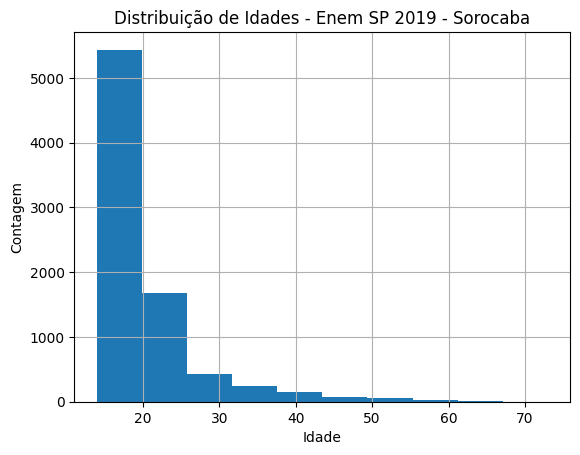

In [34]:
# Opção 1  - Histograma
sorocaba['IDADE'].hist(bins=10)
plt.title('Distribuição de Idades - Enem SP 2019 - Sorocaba')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

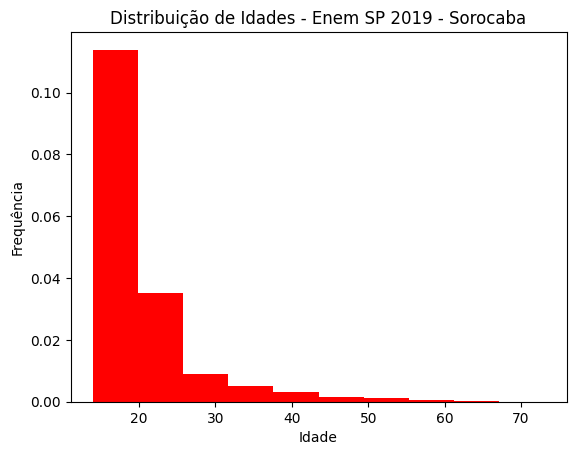

In [35]:
# Opção 2 - Histograma
# Parametros -  density=True : é a mudança de escala, de contagem para frequencia
# rwidth=1: é o espaçamento entre as barras
plt.hist(sorocaba['IDADE'],bins=10, rwidth=1, color= 'red', density=True) 
plt.title('Distribuição de Idades - Enem SP 2019 - Sorocaba')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

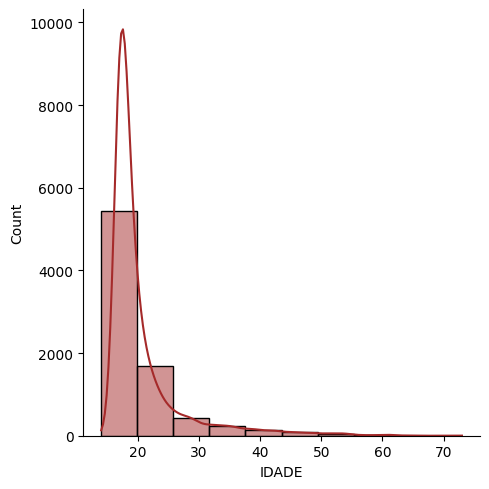

In [36]:
# PRAMETROS - kde =True : mostra uma linha de densidade e mudara o eixo y para densidade.
sns.displot(sorocaba['IDADE'],bins=10, color= 'brown', kde =True);
# plt.show()

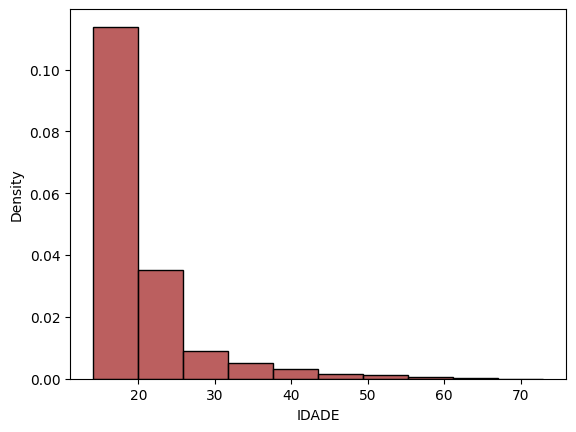

In [37]:
# sns.histplot(sorocaba['IDADE'],bins=10, color= 'brown', kde =False);
# sns.histplot(sorocaba['IDADE'],bins=10, color= 'brown', kde =False, stat='probability');
sns.histplot(sorocaba['IDADE'],bins=10, color= 'brown', kde =False, stat='density');

#### Medidas de tendências central

In [38]:
# MEDIA
print(round(df['IDADE'].mean(), 2))
print(round(df['NOTA_REDACAO'].mean(), 2))
print(f'Nota media Matemática: {df['NOTA_MT'].mean():.2f}')

# MEDIANA
print(round(df['IDADE'].median(), 2))
print(round(df['NOTA_REDACAO'].median(), 2))
print(f'Mediana da Nota  Matemática: {df['NOTA_MT'].median():.2f}')


# MODA
print(f'Moda da Idade: {df['IDADE'].mode()}')
print(f'Moda da Nota da Redação: {df['NOTA_REDACAO'].mode()}')
print(f'Moda da Nota da Matemática: {df['NOTA_MT'].mode()}')

# Usando o Describe()
df[['IDADE', 'NOTA_REDACAO', 'NOTA_MT']].describe().round(2)


20.59
593.02
Nota media Matemática: 497.59
18.0
600.0
Mediana da Nota  Matemática: 511.80
Moda da Idade: 0    17
Name: IDADE, dtype: int64
Moda da Nota da Redação: 0    600.0
Name: NOTA_REDACAO, dtype: float64
Moda da Nota da Matemática: 0    433.8
Name: NOTA_MT, dtype: float64


,IDADE,NOTA_REDACAO,NOTA_MT
count,499940.00,499940.00,499940.00
mean,20.59,593.02,497.59
std,6.47,170.54,183.47
min,12.00,0.00,0.00
25%,17.00,500.00,427.90
50%,18.00,600.00,511.80
75%,21.00,680.00,617.90
max,91.00,1000.00,984.70


In [39]:
df['IDADE'].mode()

0    17
Name: IDADE, dtype: int64

#### Medidas de dispersão e de posição

In [40]:
# Medidas de dispersão 
print(df['NOTA_MT'].var().round(2)) # variancia
print(df['NOTA_MT'].std().round(2)) # desvio padrao
print(df['NOTA_MT'].mean().round(2)) # média
# print(df['NOTA_MT'].mad()) # desvio absoluto

33659.47
183.47
497.59


In [13]:
# Medidas de posição

print(f'Min: {df['NOTA_MT'].min()}') # variancia

print(f'Primeiro: {df['NOTA_MT'].quantile(q = 0.25)}') #
print(f'Segundo: {df['NOTA_MT'].quantile(q = 0.5)}') 
print(f'Terceiro: {df['NOTA_MT'].quantile(q = 0.75)}') 

print(f'Max: {df['NOTA_MT'].max()}') # desvio padrao

Min: 0.0
Primeiro: 427.9
Segundo: 511.8
Terceiro: 617.9
Max: 984.7


### Boxplot e Outliers

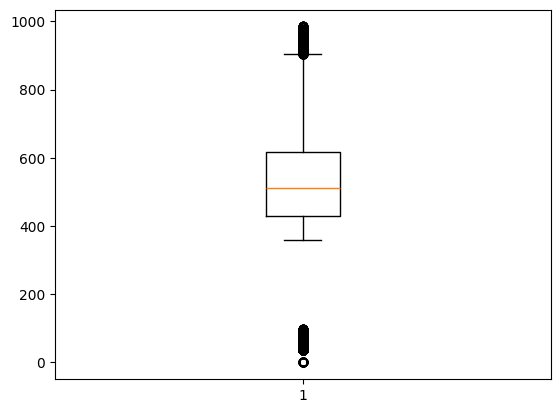

In [41]:
# Boxplot
plt.boxplot(df['NOTA_MT'])
plt.show()

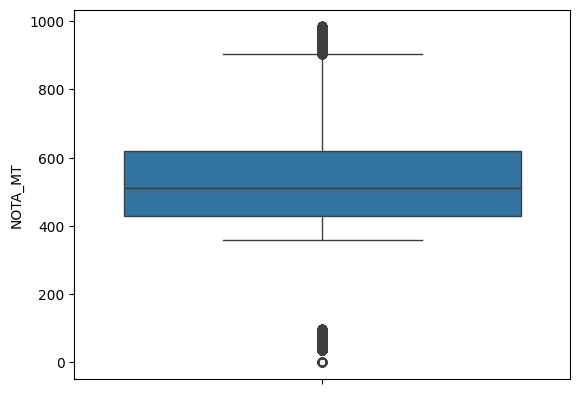

In [42]:
# Boxplot
sns.boxplot( y = 'NOTA_MT', data= df);

In [43]:
# Removendo os outliers
sem_outliers = df.loc[df['NOTA_MT'] <= 902.9]
sem_outliers = df.loc[df['NOTA_MT'] <= 359.1]

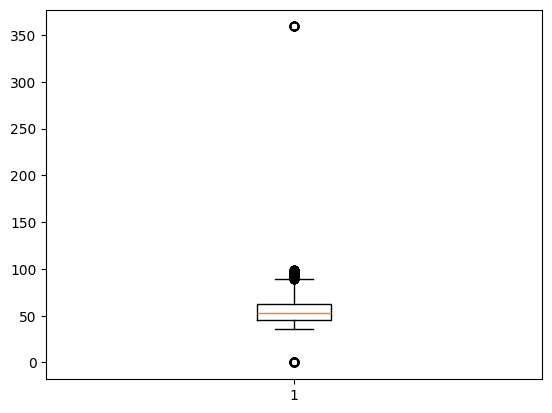

In [44]:
# Boxplot sem os outliers
plt.boxplot(sem_outliers['NOTA_MT'])
plt.show()

In [45]:
escolas_pub = df.loc[df['ESCOLA'] == 'pública']
escolas_priv= df.loc[df['ESCOLA'] == 'privada']

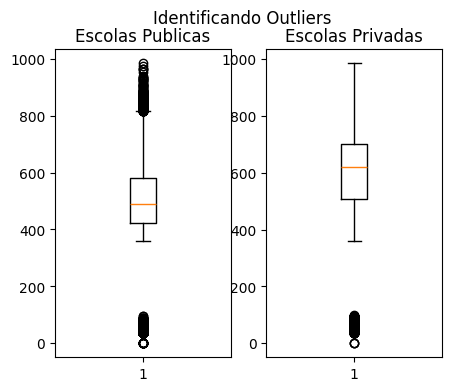

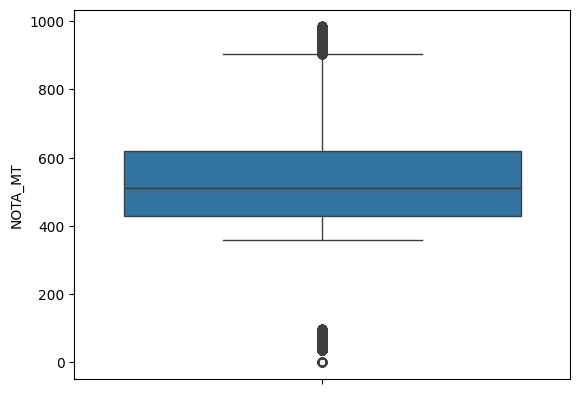

In [46]:
fig , axs = plt.subplots(nrows=1, ncols = 2, figsize=(5,4))
fig.suptitle('Identificando Outliers')

axs[0].boxplot(escolas_pub['NOTA_MT'])
axs[0].set_title('Escolas Publicas')

axs[1].boxplot(escolas_priv['NOTA_MT'])
axs[1].set_title('Escolas Privadas')

plt.show()

sns.boxplot( y = 'NOTA_MT', data= df);

## Seção 5: Estatística Probabilística para analise de dados

In [54]:
bauru = df.loc[df['NO_MUNICIPIO_RESIDENCIA'] == 'Bauru' ]
guarulhos = df.loc[df['NO_MUNICIPIO_RESIDENCIA'] == 'Guarulhos' ]


In [55]:
print(len(bauru))
bauru.head()

4171


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
477,"1,90E+11",Bauru,21,M,1,branca,1,1,não_respondeu,NaN,...,664.1,Inglês,1.0,100.0,120.0,120.0,120.0,100.0,560.0,Sim
928,"1,90E+11",Bauru,17,M,1,amarela,1,2,pública,35025240.0,...,740.3,Inglês,1.0,140.0,120.0,120.0,140.0,100.0,620.0,Sim
1070,"1,90E+11",Bauru,19,M,1,branca,1,1,não_respondeu,NaN,...,789.2,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim
1235,"1,90E+11",Bauru,18,F,1,parda,1,2,privada,35115435.0,...,71.5,Inglês,1.0,140.0,140.0,140.0,140.0,120.0,680.0,Sim
1506,"1,90E+11",Bauru,19,M,1,branca,1,1,não_respondeu,NaN,...,533.8,Espanhol,1.0,120.0,140.0,120.0,100.0,140.0,620.0,Sim


In [56]:
print(len(guarulhos))
guarulhos.head()

15647


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
56,"1,90E+11",Guarulhos,17,F,1,parda,1,2,pública,NaN,...,468.1,Espanhol,1.0,100.0,60.0,60.0,100.0,0.0,320.0,Sim
69,"1,90E+11",Guarulhos,27,M,1,nao_declarado,1,1,não_respondeu,NaN,...,743.8,Inglês,1.0,120.0,180.0,120.0,120.0,160.0,700.0,Sim
130,"1,90E+11",Guarulhos,28,F,1,branca,1,1,não_respondeu,NaN,...,415.1,Inglês,1.0,160.0,120.0,160.0,120.0,100.0,660.0,Sim
202,"1,90E+11",Guarulhos,17,F,1,parda,1,2,pública,35005824.0,...,594.9,Inglês,1.0,120.0,120.0,120.0,120.0,160.0,640.0,Sim


#### Probabilidades 

In [51]:
# Cauculo da probabilidade de ocorrer um evento.
def probabilidade (a, e):
    print(f'A probabilidade de ocorrencia é: {((a / e)*100):.2f}')

# Cauculo da probabilidade de não ocorrer um evento.
def probabilidade_nao (a, e):
    print(f'A probabilidade de não ocorrencia é: {((1 -(a / e))*100):.2f}')


if __name__ == '__main__':
# A probabilidade de retirar um estutante do estado de São Paulo
    probabilidade(len(guarulhos) , len(df))

# A probabilidade de NÃO retirar um estutante do estado de São Paulo
    probabilidade_nao(len(guarulhos) , len(df))

A probabilidade de ocorrencia é: 3.13
A probabilidade de não ocorrencia é: 96.87


#### Probabilidade de união, interseção e condicional

In [52]:
# Probabilidade União exclisiva (AUB)
def probab_uniao( A,B,E):
    print(f'Probabilidade União: {((A/E + B/E) * 100):.2f}')

# Probabilidade interseção (A∩B)
def probab_intr( A,B,E):
    print(f'Probabilidade interseção: {((A/E * B/E) * 100):.2f}')

# Probabilidade Condicional
def probab_cond( AB, B):
    print(f'Probabilidade condicional: {((AB / B) * 100):.2f}')


if __name__ == '__main__':

    #Probabilidade de retirar um estudante de guarulhoe e um de Bauru.
    probab_uniao(len(guarulhos), len(bauru), len(df))

    #Probabilidade de retirar um estudante de guarulhoe e um de Bauru.
    probab_intr(len(guarulhos), len(bauru), len(df))



    # Probabilidade de retirar uma mulher que seja parda.
    mulher = df.loc[df['SEXO'] == 'F'] # B
    parda = mulher.loc[mulher['RACA'] == 'parda'] # AB

    probab_cond(len(parda), len(mulher))


Probabilidade União: 3.96
Probabilidade interseção: 0.03
Probabilidade condicional: 30.76


#### Distribuição de probabilidade discreta
- Distribuição Binomial
- Distribuição Geometrica
- Distribuição de Poisson

In [53]:
# Distribuição Binomial
from scipy.stats import binom

# Probabilidade de retirar uma mulher
mulher = df.loc[df['SEXO']== 'F']
prob = len(mulher) / len(df)
print(prob)


# probabilidade de retirar Exatamente 4 mulheres em um total de 10 Amostras.
print(binom.pmf(4, 10, prob)) # num 

# probabilidade de retirar pelo menos 1 mulher em um total de 10 Amostras.
print(1 - binom.pmf(0, 10, prob)) # num 

# probabilidade de retirar mais  1 mulher em um total de 10 Amostras.
print(1 - (binom.pmf(0, 10, prob) + binom.pmf(1, 10, prob))) 

# probabilidade de retirar mais  do que 3 mulher em um total de 10 Amostras.
print(1 - (binom.pmf(0, 10, prob) + binom.pmf(1, 10, prob)
           + binom.pmf(2, 10, prob)+ binom.pmf(3, 10, prob)))
# ou
# probabilidade de retirar mais  do que 3 mulher em um total de 10 Amostras.
print(1 - (binom.cdf(3, 10, prob))) 


# probabilidade de retirar Exatamente 8 mulheres em um total de 10 Amostras.
print(binom.pmf(9, 10, prob)+ binom.pmf(10, 10, prob)) 


0.5803136376365163
0.13014261971434243
0.9998304692157152
0.997486313318782
0.929117468512205
0.929117468512205
0.03565630595957381


In [57]:
# Distribuição Geometrica
from scipy.stats import geom

# p == (prob) = probabilidade de sucesso em uma tentativa. (prob)
# q = probabilidade de fracasso em uma tentativa.
# x = variável aleatoria que representa o número de falhas ate o sucesso.

# probabilidade  de retirar 3 amostrase nenhuma ser mulher (fracasso)
print(geom.pmf(4, prob))

0.042898029955685306


In [60]:
# Distribuição de Poisson
from scipy.stats import poisson

#(Exemplo): Num local de prova, 100 alunos normalmente termina a prova em 2h.
# A probabilidade de exatamente 90 % dos vestibulandos terminhar a prova em 2h.
print(poisson.pmf(90, 100))

0.025038944623030353


### Teste de Normalidade


In [59]:
# import statsmodels

Vários métodos de estimação e testes de hipóteses foram criados sob a suposição de que a amostra aleatória tenha distribuição normal

In [61]:
enem_tupa = df.loc[df['NO_MUNICIPIO_RESIDENCIA'] == 'Tupã']

In [62]:
enem_tupa.shape

(524, 28)

In [63]:
enem_tupa.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
1623,"1,90E+11",Tupã,19,F,1,branca,1,1,não_respondeu,NaN,...,42.7,Inglês,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
2281,"1,90E+11",Tupã,19,M,1,branca,1,1,não_respondeu,NaN,...,656.8,Inglês,1.0,140.0,140.0,140.0,200.0,180.0,800.0,Sim
5493,"1,90E+11",Tupã,18,F,1,branca,2,2,pública,NaN,...,515.6,Espanhol,1.0,160.0,120.0,140.0,120.0,100.0,640.0,Sim
7465,"1,90E+11",Tupã,19,M,1,branca,1,1,não_respondeu,NaN,...,628.4,Inglês,1.0,140.0,160.0,160.0,180.0,160.0,800.0,Sim
7898,"1,90E+11",Tupã,28,M,1,branca,1,1,não_respondeu,NaN,...,701.5,Inglês,1.0,120.0,160.0,120.0,120.0,140.0,660.0,Sim


TESTES DE NORMALIDADE

Existem testes de normalidade numéricos e testes gráficos:

Shapiro-Wilk (limite de 5000 amostras)

Kolmogorov_Smirnov

Histograma 

QQplot

#### Histograma

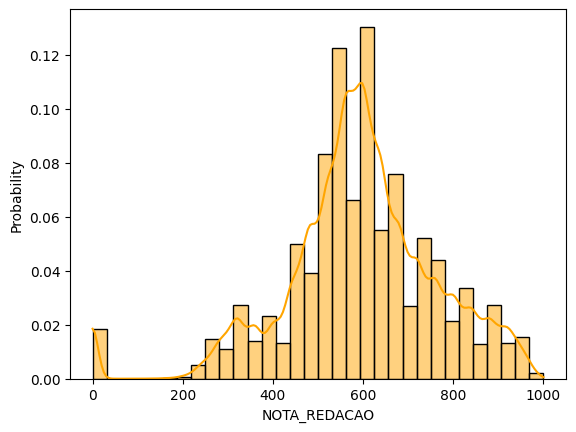

In [64]:
sns.histplot(df, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

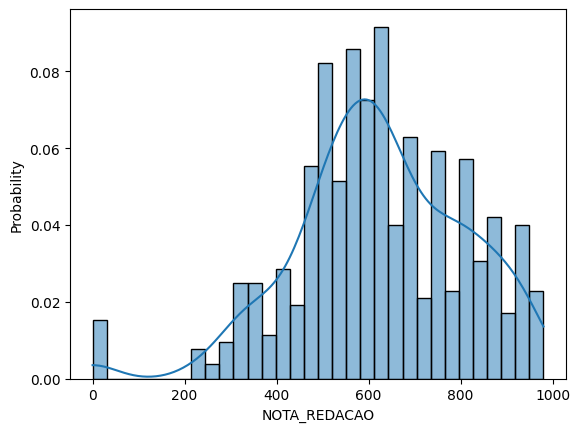

In [65]:
sns.histplot(enem_tupa, x='NOTA_REDACAO', bins=32, kde=True, stat="probability");

#### QQPLOT

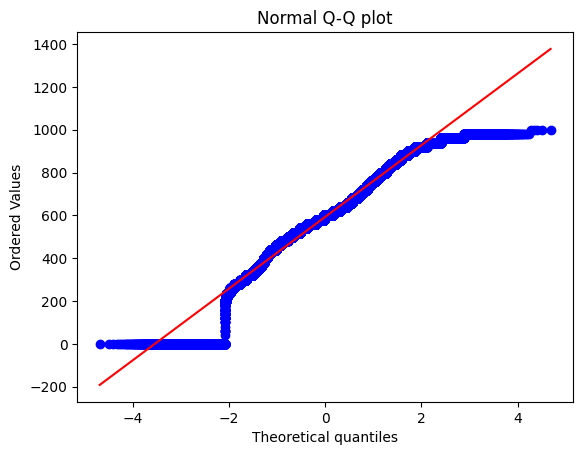

In [67]:
stats.probplot(df['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

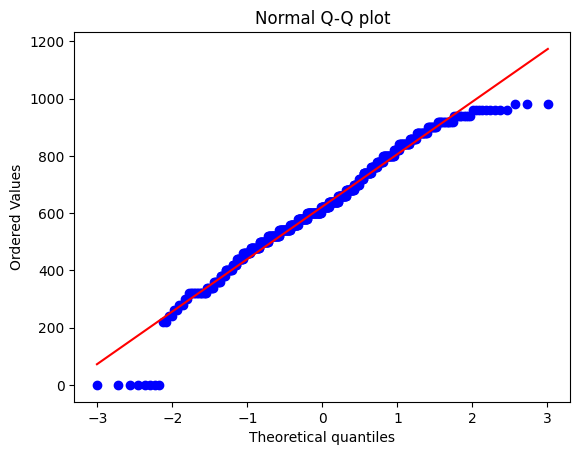

In [68]:
stats.probplot(enem_tupa['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

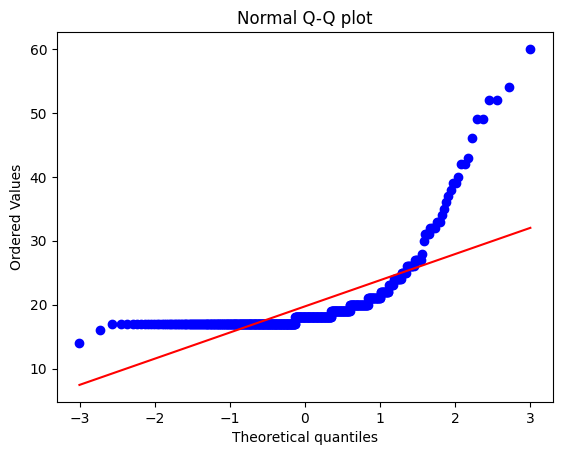

In [69]:
stats.probplot(enem_tupa['IDADE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

#### Teste de Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [71]:
print(stats.shapiro(df['NOTA_REDACAO'])) # O warnig é um aviso pelo número de amostas que neste caso é acima do indicado para o teste.
print(f'Numero de amostras: {len(df)}') 

ShapiroResult(statistic=np.float64(0.963339132223719), pvalue=np.float64(4.0266750341791595e-114))
Numero de amostras: 499940


c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 499940.
  res = hypotest_fun_out(*samples, **kwds)


O teste de Shapiro_Wilk não se aplica a dados maiores que 5000.

In [72]:
print(stats.shapiro(enem_tupa.NOTA_REDACAO))

ShapiroResult(statistic=np.float64(0.973306264292824), pvalue=np.float64(3.5379943274865826e-08))


### Teste Lilliefors (Kolmogorov-Smirnov)

In [77]:
# 
from statsmodels.stats.diagnostic import lilliefors

In [81]:
#  Teste Lilliefors (Kolmogorov_Sminorv)
print(f'Amostra notas de redação df do estado de SP: {statsmodels.stats.diagnostic.lilliefors(df['NOTA_REDACAO'], dist = 'norm')}')

print(f'Amostra notas de redação df da cidade de Tupã: {statsmodels.stats.diagnostic.lilliefors(enem_tupa['NOTA_REDACAO'], dist = 'norm')}')

Amostra notas de redação df do estado de SP: (np.float64(0.0831243667968013), np.float64(0.0009999999999998899))
Amostra notas de redação df da cidade de Tupã: (np.float64(0.053966451207192984), np.float64(0.0020401155999012818))


## Seção 6 - Fundamentos de estatística inferencial para analise de dados

### Teste de Hipóteses com uma amostra: TesteZ

In [82]:
colegiox = df.loc[df['CO_ESCOLA']== 35017632.0]
print(colegiox.shape)
colegiox.head()

(41, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [83]:
# Analizar o tipo de dado
colegiox.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 37 to 445809
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NU_INSCRICAO             41 non-null     object 
 1   NO_MUNICIPIO_RESIDENCIA  41 non-null     object 
 2   IDADE                    41 non-null     int64  
 3   SEXO                     41 non-null     object 
 4   TP_ESTADO_CIVIL          41 non-null     int64  
 5   RACA                     41 non-null     object 
 6   TP_NACIONALIDADE         41 non-null     int64  
 7   TP_ST_CONCLUSAO          41 non-null     int64  
 8   ESCOLA                   41 non-null     object 
 9   CO_ESCOLA                41 non-null     float64
 10  NO_MUNICIPIO_ESC         41 non-null     object 
 11  TP_PRESENCA_CN           41 non-null     int64  
 12  TP_PRESENCA_CH           41 non-null     int64  
 13  TP_PRESENCA_LC           41 non-null     int64  
 14  TP_PRESENCA_MT           41 

In [84]:
# Analizar se tem algum dado faltante
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

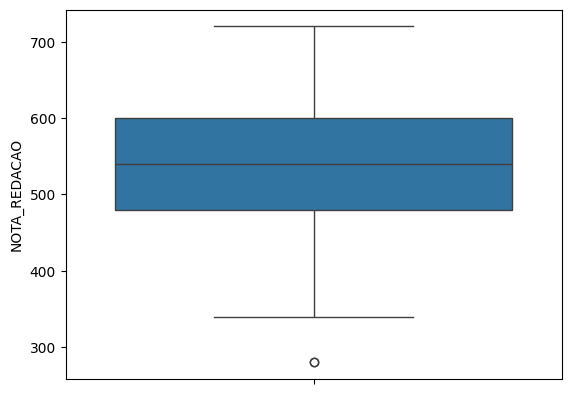

In [86]:
# verifica se há outliers
# neste caso optou-se pela nota de redação.
sns.boxplot( y = 'NOTA_REDACAO', data= colegiox);

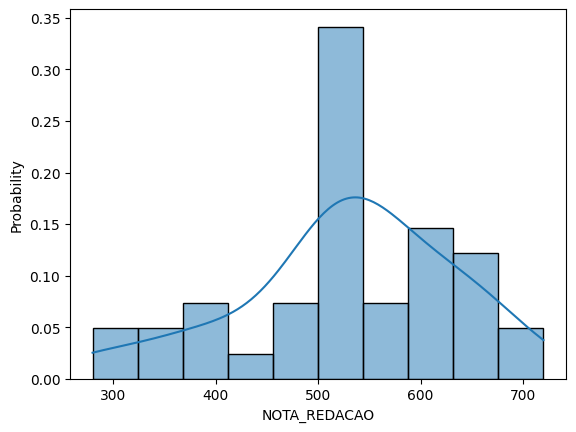

In [87]:
sns.histplot(colegiox, x = 'NOTA_REDACAO', bins = 10, kde=True, stat='probability');

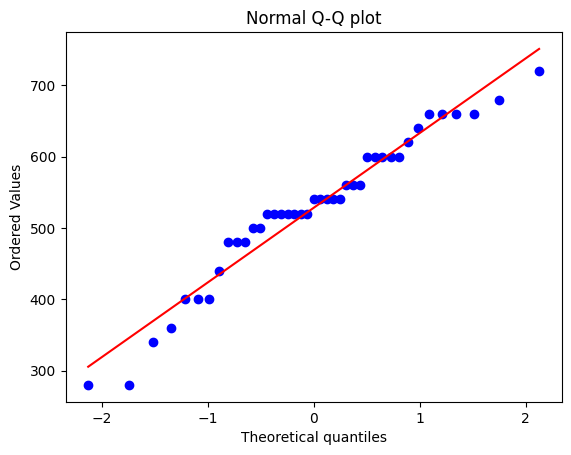

In [88]:
stats.probplot(colegiox['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

TESTE DE HIPOTESE

CRITÉRIOS:

Nível de significância de 0,05 ou 5% (mais utilizado).

Quando p> 0,005 == distribuição normal.

In [89]:
# Teste Shapiro_Wilk
print(stats.shapiro(colegiox['NOTA_REDACAO']))

ShapiroResult(statistic=np.float64(0.9529763299532606), pvalue=np.float64(0.0890553220808477))


In [90]:
# Teste Lillifors (Kolmogorov Sminorv)
print(statsmodels.stats.diagnostic.lilliefors(colegiox['NOTA_REDACAO'], dist='norm'))

(np.float64(0.15115505856545197), np.float64(0.020310301942343047))


In [91]:
# Teste Anderson-Darling
print(stats.anderson(colegiox['NOTA_REDACAO'], 'norm'))
# neste caso o terciro valor da  critical_values=array ==  0.727, indica que a distribuição das notas de redação é normal. 

AndersonResult(statistic=np.float64(0.6984616237351489), critical_values=array([0.532, 0.606, 0.727, 0.848, 1.009]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(528.2926829268292), scale=np.float64(104.01688418291499))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


**TESTE Z** 

(Aplicas-se o teste z já que os teste anteriores indicaram que a distribuição de notas era normal).

O teste é para ver se a Média das notas do colegio X, é igual a media das notas do estado de SP.

H0 = média é igual a de SP: p > 0.05

Ha = média é diferente a de SP: p <= 0.05

In [92]:
from statsmodels.stats.weightstats import ztest

In [93]:
df['NOTA_REDACAO'].describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [94]:
colegiox['NOTA_REDACAO'].describe()

count     41.000000
mean     528.292683
std      104.016884
min      280.000000
25%      480.000000
50%      540.000000
75%      600.000000
max      720.000000
Name: NOTA_REDACAO, dtype: float64

In [ ]:
stat, p = ztest(colegiox['NOTA_REDACAO'], value= 593.018322, )
print(f'Estatistica do teste: {stat:.2f}')
print(f'p_valor: {p}') # Não arredondar!

# Resposta / Interpretação
# Teste Estatístico: Z = -3.98
# p_valor: 6.76e-05

Estatistica do teste: -3.98
p_valor: 6.764690770781719e-05


**Conclusão:** Estatisticamente , a média do colegio x é diferente da média do Estado de São Paulo. Com intervalo de confiança de 95%.

### Teste de Hipóteses com uma amostra: Teste T

In [96]:
colegioy = df.loc[df['CO_ESCOLA'] == 35151506.0]
print(colegioy.shape)
colegioy.head()

(30, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35151506.0,...,64.0,Inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,Sim
7910,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35151506.0,...,699.5,Inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,Sim
14367,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,780.2,Inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,Sim
22519,"1,90E+11",São Paulo,17,F,1,preta,1,2,privada,35151506.0,...,732.2,Inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,Sim
58184,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,756.3,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


1) Analisar a classificação das variáveis

In [97]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [98]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

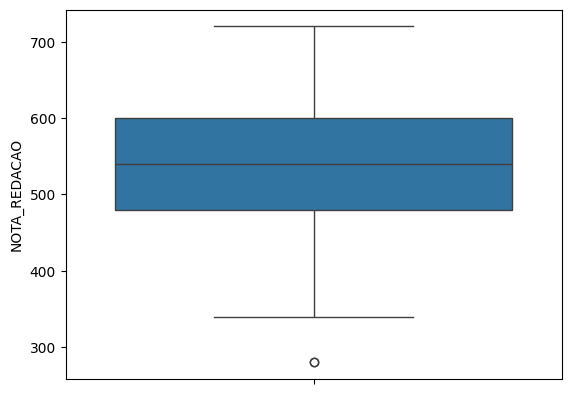

In [99]:
sns.boxplot( y = 'NOTA_REDACAO', data= colegiox);

4) Analisar Normalidade

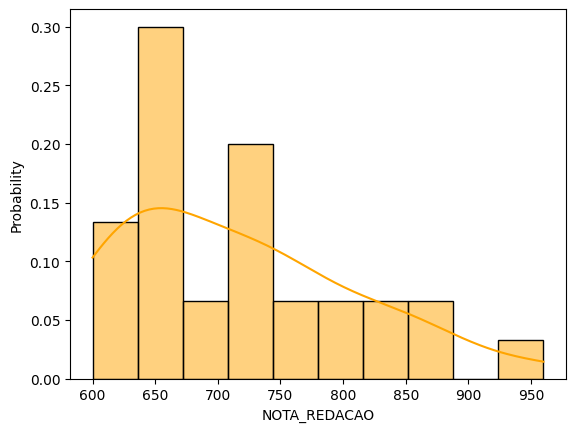

In [100]:
sns.histplot(colegioy, x='NOTA_REDACAO', bins=10, color="orange", kde=True, stat="probability");

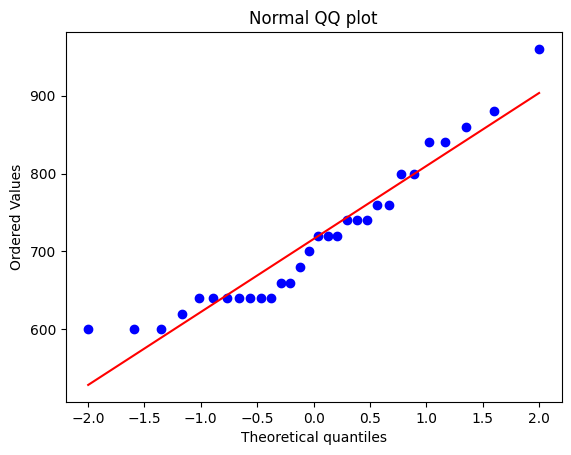

In [101]:
stats.probplot(colegioy['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [102]:
# Teste Shapiro-Wilk
print(f'Shapiro: {stats.shapiro(colegioy.NOTA_REDACAO)}')

Shapiro: ShapiroResult(statistic=np.float64(0.9185916932947775), pvalue=np.float64(0.024660758263151148))


In [103]:
# Teste Lilliefors (Kolmogorov_Sminorv)
print(statsmodels.stats.diagnostic.lilliefors(colegioy.NOTA_REDACAO, dist = 'norm'))

(np.float64(0.15794211976028916), np.float64(0.052842042822119004))


In [104]:
# Teste Anderson-Darling
print(stats.anderson(colegioy.NOTA_REDACAO, 'norm'))

AndersonResult(statistic=np.float64(0.8227980663381267), critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(716.0), scale=np.float64(93.86711076174988))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


**TESTE T**

Média das notas do colégio Y, comparada a média do Estado de São Paulo.

Ho = média é igual a de São Paulo : p > 0.05

Ha = média é diferente da de São Paulo : p <= 0.05

In [105]:
df['NOTA_REDACAO'].describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

**Teste T**

In [106]:
stat, p = stats.ttest_1samp(colegioy['NOTA_REDACAO'], popmean=593.018)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 7.18
p-valor: 6.72e-08


In [107]:
colegioy['NOTA_REDACAO'].describe()

count     30.000000
mean     716.000000
std       93.867111
min      600.000000
25%      640.000000
50%      710.000000
75%      760.000000
max      960.000000
Name: NOTA_REDACAO, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: t = 7,18

p_valor = 6.72e-08

Conclusão: Estatisticamente, a média de redação do colégio y é diferente da média do Estado de São Paulo, com intervalo de confiança de 95%.



### Correlação

#### Correlação - Regressão

In [110]:
colegiox = df.loc[df['CO_ESCOLA']== 35017632.0]
colegiox.shape

(41, 28)

In [111]:
# Lista com nota final
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [114]:
colegiox['nota_final'] = (colegiox[nota_final].mean(axis=1))
# Pode ignorar o warning! para o proposto funciona e é suficiente por enquanto.

C:\Users\lucas\AppData\Local\Temp\ipykernel_2444\1943582510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['nota_final'] = (colegiox[nota_final].mean(axis=1))


In [115]:
colegiox.head()
colegiox.columns

Index(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'IDADE', 'SEXO',
       'TP_ESTADO_CIVIL', 'RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'ESCOLA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NOTA_CN',
       'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5', 'NOTA_REDACAO', 'INTERNET',
       'nota_final'],
      dtype='object')

In [116]:
notas_colegiox = colegiox[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH', 'NOTA_REDACAO', 'nota_final']]
notas_colegiox.head()

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


#### Gráfico correlação

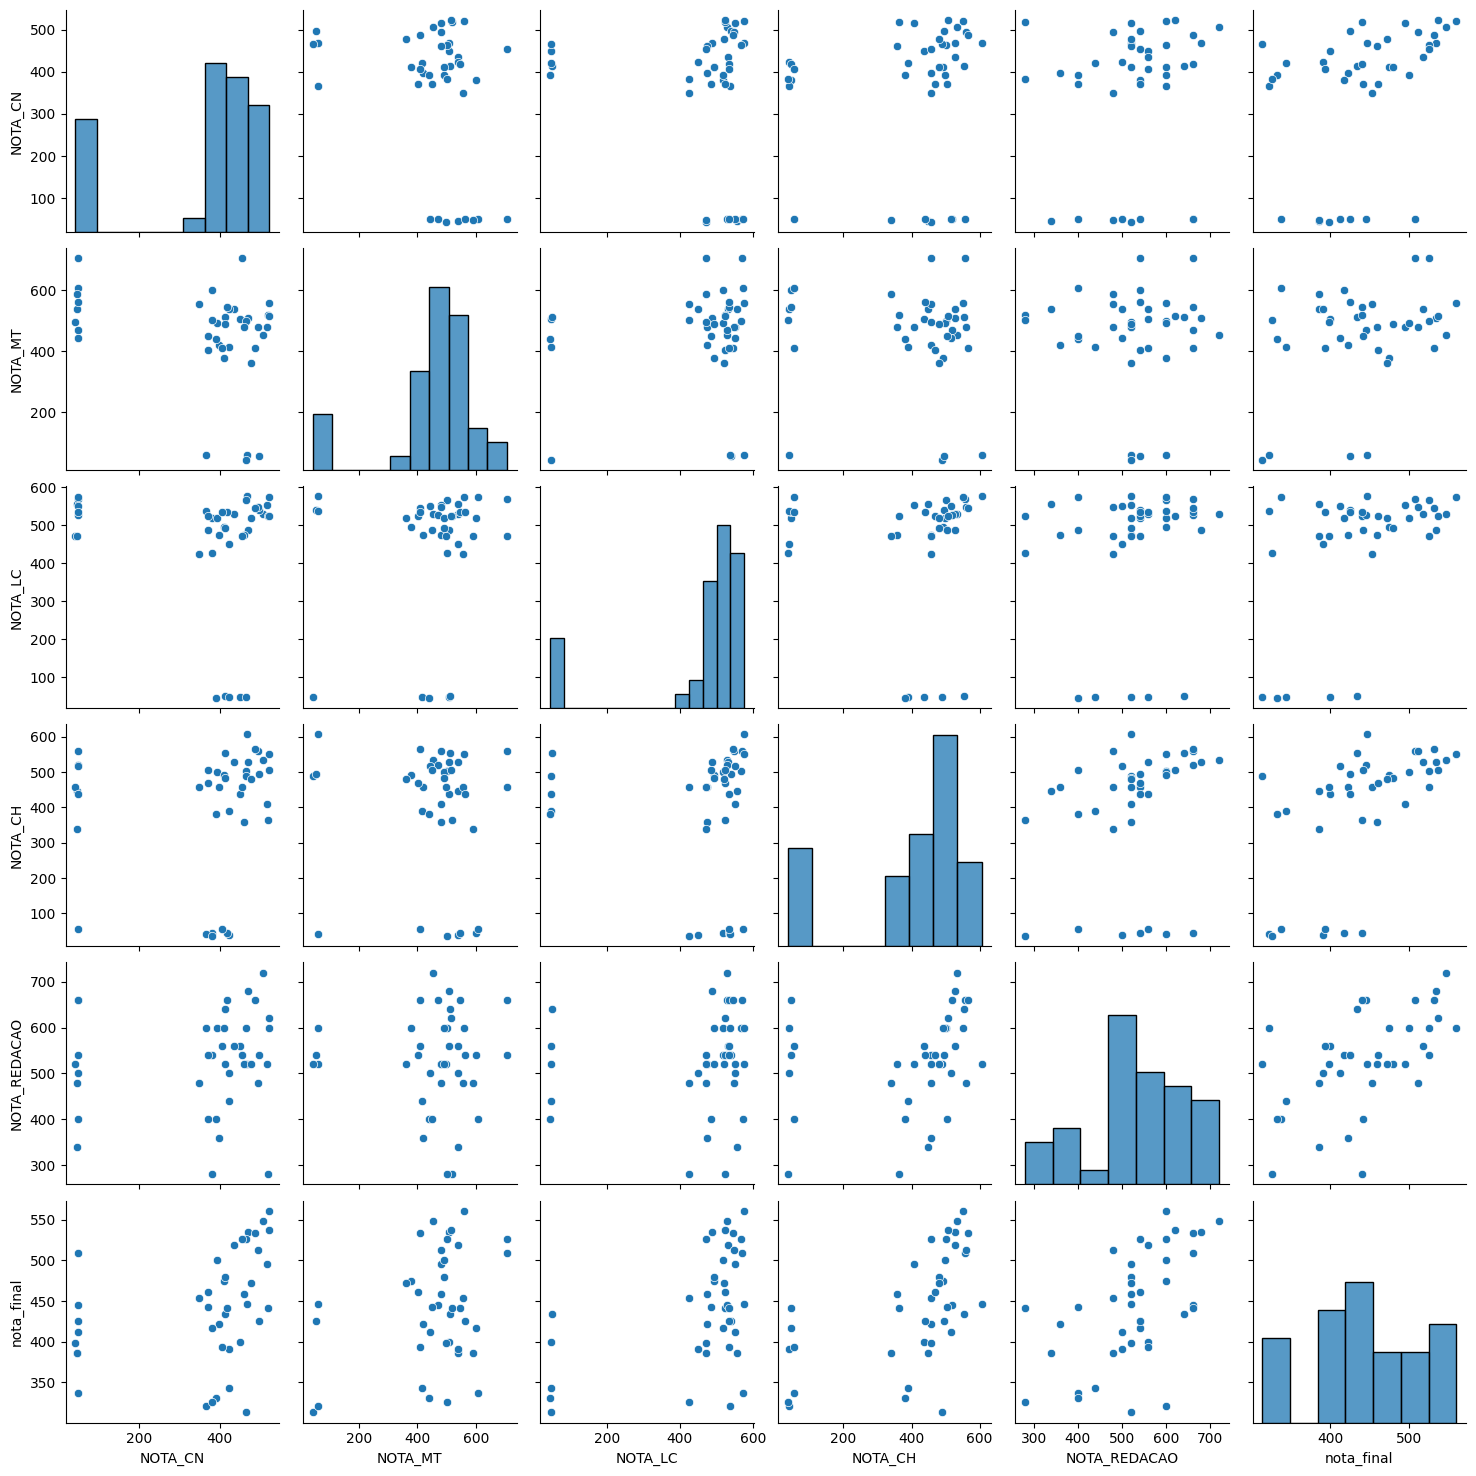

In [117]:
# Plota gráficos de dispersão para todas as combinações de colunas do DataFrame 'notas_colegiox'. 
# Útil para analisar as relações entre as variáveis e identificar possíveis correlações.
sns.pairplot(notas_colegiox);

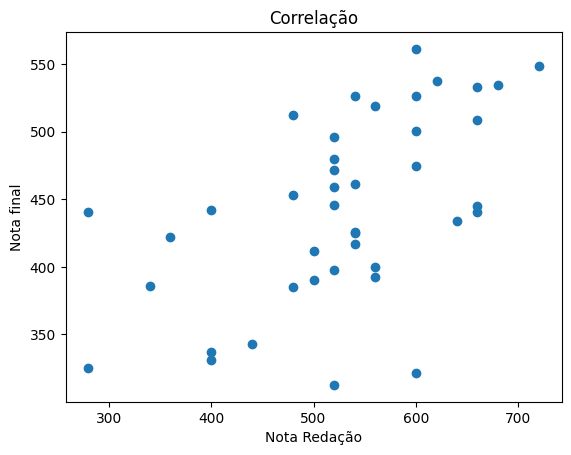

In [118]:
# Plota um gráfico de dispersão comparando a nota de redação ('NOTA_REDACAO') com a nota final ('nota_final')
# do DataFrame 'notas_colegiox'. Útil para visualizar a relação entre a nota de redação e a nota final.

plt.scatter(notas_colegiox.NOTA_REDACAO,notas_colegiox.nota_final)
plt.title('Correlação')
plt.xlabel('Nota Redação')
plt.ylabel('Nota final')
plt.grid(False)
plt.show()

In [120]:
correlacoes = notas_colegiox.corr(method='pearson') # o metodo pearson é uma distribuuição normal.
#(method='spearman'): é usado para dado não parametrico, não será usado neste caso.
#(method='Kendall'): não se aplica pois há mais de 30 amostras.
correlacoes

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
NOTA_CN,1.000000,-0.299411,-0.158243,0.083520,0.132366,0.352986
NOTA_MT,-0.299411,1.000000,0.137463,-0.078817,-0.024316,0.322042
NOTA_LC,-0.158243,0.137463,1.000000,-0.040875,0.125635,0.472561
NOTA_CH,0.083520,-0.078817,-0.040875,1.000000,0.264781,0.579168
NOTA_REDACAO,0.132366,-0.024316,0.125635,0.264781,1.000000,0.551220
nota_final,0.352986,0.322042,0.472561,0.579168,0.551220,1.000000


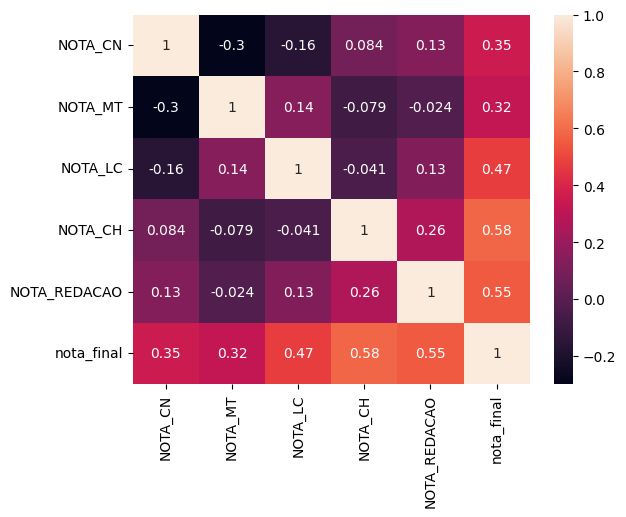

In [122]:
# mapa de calor para ver as correlações
plt.figure()
sns.heatmap(correlacoes, annot=True);

#### Análise da Normalidade

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
# Nota de redação
resp = stats.shapiro(notas_colegiox['NOTA_REDACAO'])
print(f'Estatistica do teste: {resp[0]}\nP valor: {resp[1]}')
# distribuição normal pois o P valor é maior que 0.05

Estatistica do teste: 0.9529763299532606
 P valor: 0.0890553220808477


In [ ]:
# Nota final
resp = stats.shapiro(notas_colegiox['nota_final'])
print(f'Estatistica do teste: {resp[0]} \nP valor: {resp[1]}')

# distribuição não normal

Estatistica do teste: 0.9638937238354808
 P valor: 0.21481981501951075


In [132]:
# Nota de Matemática
resp = stats.shapiro(notas_colegiox['NOTA_MT'])
print(f'Estatistica do teste: {resp[0]} \nP valor: {resp[1]}')

# distribuição não normal

Estatistica do teste: 0.7985680269657053 
P valor: 5.104770265030071e-06


In [133]:
# Nota de Ciências da Natureza
resp = stats.shapiro(notas_colegiox['NOTA_CN'])
print(f'Estatistica do teste: {resp[0]} \nP valor: {resp[1]}')

# distribuição não normal

Estatistica do teste: 0.7349030431075122 
P valor: 2.9953271536261865e-07


In [134]:
# Nota de Linguagem e Códigos
resp = stats.shapiro(notas_colegiox.NOTA_LC)
print(f'Estatistica do teste: {resp[0]} \nP valor: {resp[1]}')

# distribuição não normal

Estatistica do teste: 0.5986177238013685 
P valor: 2.2351723614082924e-09


In [135]:
# Nota de Ciências Humanas
resp = stats.shapiro(notas_colegiox.NOTA_CH)
print(f'Estatistica do teste: {resp[0]} \nP valor: {resp[1]}')

# distribuição não normal

Estatistica do teste: 0.7509263405494057 
P valor: 5.865799665572735e-07


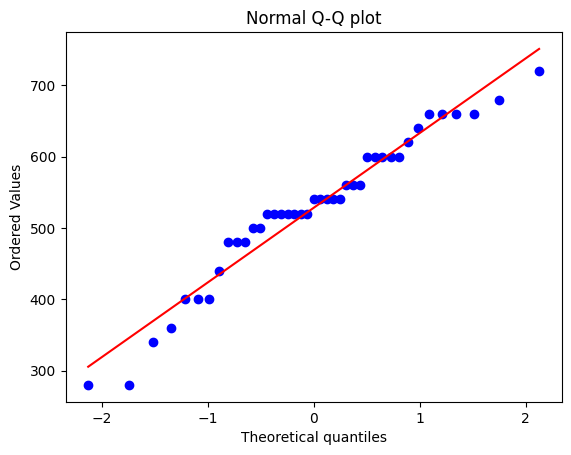

In [136]:
stats.probplot(notas_colegiox['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Análise dos Outliers

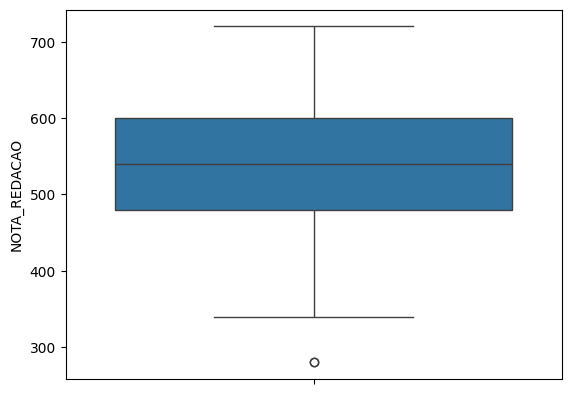

In [137]:
sns.boxplot( y = 'NOTA_REDACAO', data= notas_colegiox);

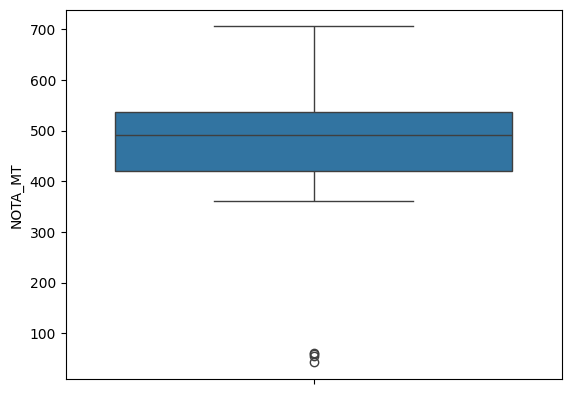

In [138]:
sns.boxplot( y = 'NOTA_MT', data= notas_colegiox);

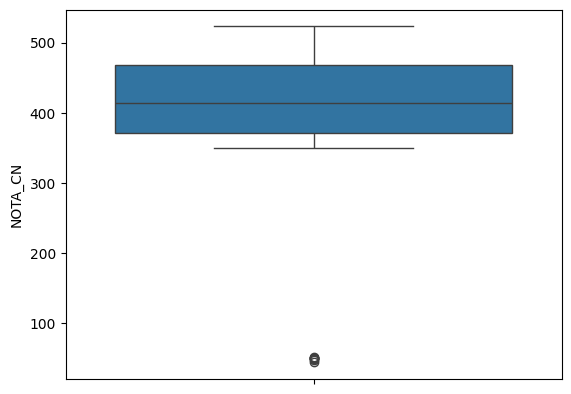

In [139]:
sns.boxplot( y = 'NOTA_CN', data= notas_colegiox);

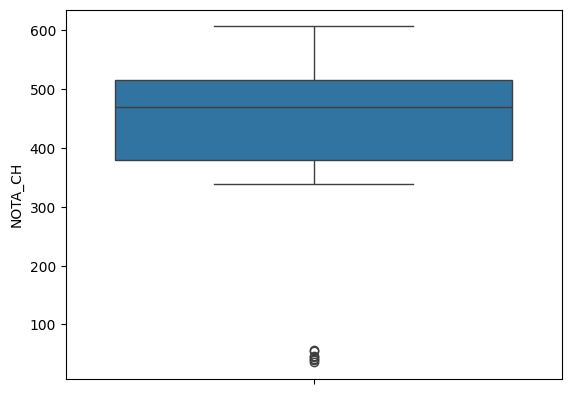

In [140]:
sns.boxplot( y = 'NOTA_CH', data= notas_colegiox);

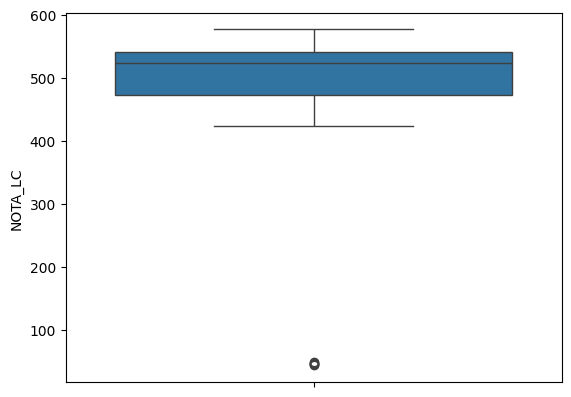

In [141]:
sns.boxplot( y = 'NOTA_LC', data= notas_colegiox);

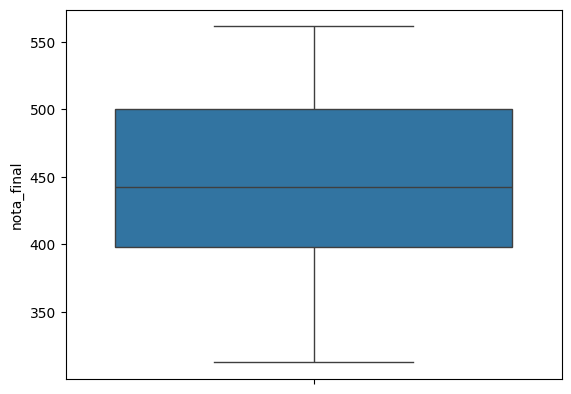

In [142]:
sns.boxplot( y = 'nota_final', data= notas_colegiox);

### Regressão Linear com Statsmodels

In [143]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [144]:
# Realiza uma regressão linear usando a fórmula 'nota_final  'NOTA_REDACAO'
# onde 'nota_final' é a variável dependente e 'NOTA_REDACAO' é a variável independente.
# Os dados utilizados para a regressão estão no DataFrame 'notas_colegiox'.
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = notas_colegiox).fit()

# Exibe um resumo dos resultados da regressão, incluindo estatísticas como coeficientes,
# erro padrão, valor t, valor p, intervalo de confiança, R-quadrado, etc.
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     17.02
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000188
Time:                        22:52:22   Log-Likelihood:                -223.52
No. Observations:                  41   AIC:                             451.0
Df Residuals:                      39   BIC:                             454.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      251.6789     47.319      5.319   

In [146]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

              Coeficientes
Intercept       251.678855
NOTA_REDACAO      0.362749


Equação:

Nota Final = 251,678855 + 0,362749 * Nota Redação

In [147]:
notas_colegiox.head()

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


In [148]:
regressao.predict()

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [149]:
residuos = regressao.resid
residuos

37         10.566428
44         35.561745
52        -55.218388
65          5.851578
79        -50.218321
84         39.811445
85         36.531712
91         63.921612
17070      57.251645
17072    -127.628422
17078     -22.083405
17110     -42.653438
108151     17.606695
108155     87.571378
108180     55.451578
138498    -68.448488
182510     86.501545
182519     18.771578
182528     27.621545
182546    -30.503405
182581    -45.833305
182613    -50.333305
182614     78.516595
182615     42.066695
182637    -42.508422
182683     31.031645
182697   -148.128355
230978    -59.558522
287389     13.896595
287716    -40.338455
347945    -65.858522
365950      5.551645
365951    -61.998388
365980    -21.493438
365984     39.151578
365986    -28.028622
378313     91.931645
445647    -22.163405
445741     31.491578
445790     45.381478
445809     60.956662
dtype: float64

C:\Users\lucas\AppData\Local\Temp\ipykernel_2444\2678491900.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')


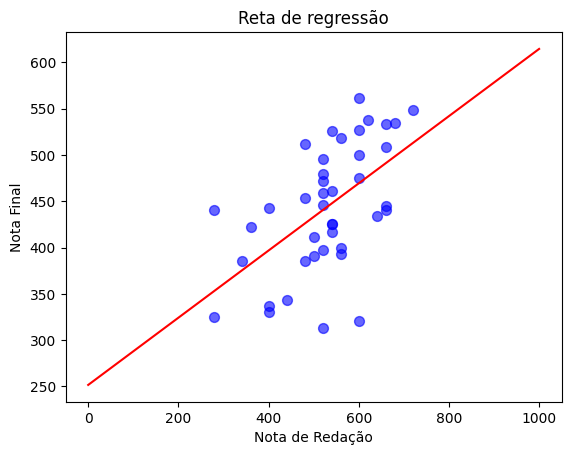

In [150]:
plt.scatter(y=notas_colegiox['nota_final'], x=notas_colegiox['NOTA_REDACAO'], color='blue', s=50, alpha=0.6)
# X_plot = np.linspace(min(notas_colegiox['NOTA_REDACAO']), max(notas_colegiox['nota_final']), len(notas_colegiox['NOTA_REDACAO']))
X_plot = np.linspace(0, 1000)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Nota Final')
plt.xlabel('Nota de Redação')
plt.show()

#### Teste de Normalidade dos resíduos

In [151]:
# Residuos da nota redação
stats.shapiro(residuos)

ShapiroResult(statistic=np.float64(0.9587119348050434), pvalue=np.float64(0.14175949675428023))

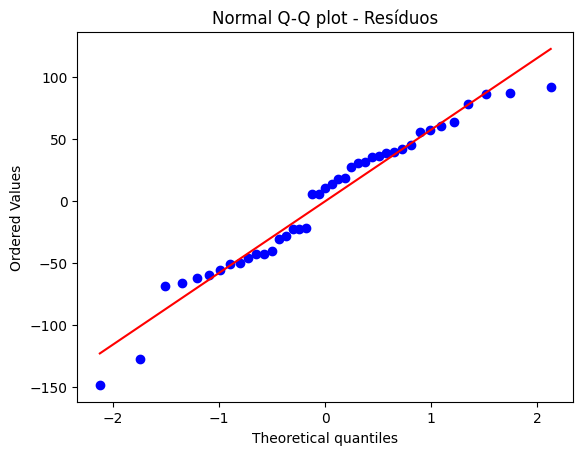

In [152]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

#### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

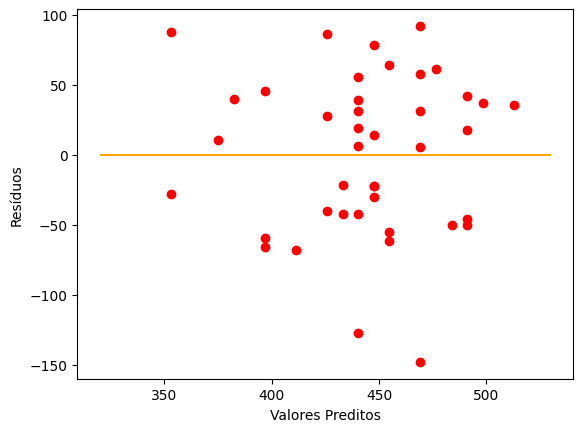

In [153]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=320, xmax=530, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

### Regressão Linear com Sklearn

In [154]:
notas_colegiox.head()

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


In [155]:
x = notas_colegiox.iloc[:, 4].values
y = notas_colegiox.iloc[:, 5].values

In [157]:
correlacao2 = np.corrcoef (x, y)
correlacao2

array([[1.        , 0.55122032],
       [0.55122032, 1.        ]])

In [158]:
x = x.reshape(-1,1) #transformando em matriz

In [ ]:
from sklearn.linear_model import LinearRegression

regressao2 = LinearRegression() # cria o modelo de regreção linear
regressao2.fit(x,y)

LinearRegression()

In [ ]:
print(regressao2.intercept_) # coeficiente linear, que vai interceptar o eixo y

251.6788552750226


In [ ]:
print(regressao2.coef_) # coeficiente angular

[0.36274917]


In [ ]:
# coeficiente de determinação
print(regressao2.score(x,y)) # é quantos % os dados dão de explicação para o modelo de regreção.

0.30384384379611706


In [ ]:
# previsoes
previsoes = regressao2.predict(x)
print(previsoes)

[375.01357169 512.85825473 454.81838819 440.30842155 483.83832146
 382.268555   498.3482881  454.81838819 469.32835482 440.30842155
 447.56340487 433.05343823 491.09330478 353.24862173 440.30842155
 411.28848828 425.79845491 440.30842155 425.79845491 447.56340487
 491.09330478 491.09330478 447.56340487 491.09330478 440.30842155
 469.32835482 469.32835482 396.77852164 447.56340487 425.79845491
 396.77852164 469.32835482 454.81838819 433.05343823 440.30842155
 353.24862173 469.32835482 447.56340487 440.30842155 396.77852164
 476.58333814]


In [164]:
# se a nota da redação fosse X qual seria a nota do aluno? a predição faz isso
previsao = regressao2.predict([[800]])
print('A previsão de nota para o aluno de acordo com a nota de redação dele é: \nPrevisão:' ,previsao)

A previsão de nota para o aluno de acordo com a nota de redação dele é: 
Previsão: [541.87818801]


#### TESTE WILCOXON (duas amostras dependentes) 

Teste não parametrico.

Repete a amostra (colegioy) e os passos 1 2 3 e 4 do Teste T

Objetivo:
Analisar a diferença mediana da nota de redação com relação aos seus componentes.

**Obs.:** amostras independentes = analisa diferença nas medianas. 

amostras dependentes = analisa a mediana das diferenças.

4) Analisar Normalidade

A diferença entre as variáveis é que deve ser normal.

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [239]:
diferenca1 = colegioy['NOTA_REDACAO'] - colegioy['COMP1']
diferenca2 = colegioy['NOTA_REDACAO'] - colegioy['COMP2']
diferenca3 = colegioy['NOTA_REDACAO'] - colegioy['COMP3']
diferenca4 = colegioy['NOTA_REDACAO'] - colegioy['COMP4']
diferenca5 = colegioy['NOTA_REDACAO'] - colegioy['COMP5']

In [240]:
# Teste Shapiro-Wilk
print(stats.shapiro(diferenca5))

ShapiroResult(statistic=np.float64(0.9188712937965982), pvalue=np.float64(0.025074676415855347))


**TESTE WILCOXON**

Comparação das Medianas das diferenças que não passaram no teste de normalidade.

Ho = NÃO HÁ DIFERENÇA ENTRE AS DIFERENÇAS DAS MEDIANAS: p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS DIFERENÇAS DAS MEDIANAS: p <= 0.05

In [241]:
stat, p = stats.wilcoxon(diferenca1,diferenca3)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 30.5
p-valor: 0.8127423726


In [242]:
print(f'Mediana diferença 1 : {diferenca1.median()}')
print(f'Mediana diferença 3 : {diferenca3.median()}')

Mediana diferença 1 : 560.0
Mediana diferença 3 : 560.0


In [243]:
stat, p = stats.wilcoxon(colegioy['COMP1'],colegioy['COMP3'])
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 30.5
p-valor: 0.8127423726


In [244]:
stat, p = stats.wilcoxon(diferenca1, diferenca4)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 59.5
p-valor: 0.2162656891


In [245]:
print(diferenca4.median())

560.0


In [246]:
stat, p = stats.wilcoxon(diferenca1, diferenca5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 142.0
p-valor: 0.8136637158


In [247]:
print(diferenca5.median())

570.0


In [248]:
stat, p = stats.wilcoxon(diferenca3, diferenca4)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 15.0
p-valor: 0.0880815117


In [249]:
stat, p = stats.wilcoxon(diferenca3, diferenca5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 113.0
p-valor: 0.6545435529


In [250]:
stat, p = stats.wilcoxon(diferenca4, diferenca5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 94.5
p-valor: 0.6892233017


Conclusão: Estatisticamente, com intervalo de confiança de 95%, não há evidências para afirmar que existe diferença na diferença das medianas analisadas. 

### TESTE T Student (duas amostras independentes) 

Objetivo:
Analisar a diferença entre as médias de dois componentes de redação do colégio y.






Amostras pequenas (menor que 30)

Não necessita conhecimento do desvio padrão

In [167]:
colegioy = df.loc[df['CO_ESCOLA'] == 35151506.0]
colegioy.shape

(30, 28)

In [168]:
colegioy.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35151506.0,...,64.0,Inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,Sim
7910,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35151506.0,...,699.5,Inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,Sim
14367,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,780.2,Inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,Sim
22519,"1,90E+11",São Paulo,17,F,1,preta,1,2,privada,35151506.0,...,732.2,Inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,Sim
58184,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,756.3,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


PASSOS
1) Analisar a classificação das variáveis

In [169]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [170]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

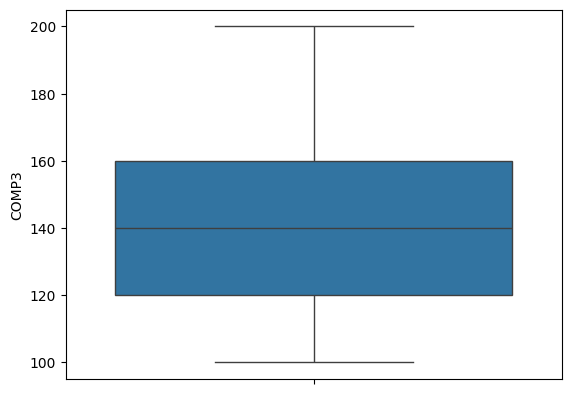

In [ ]:
sns.boxplot(y="COMP3", data = colegioy);

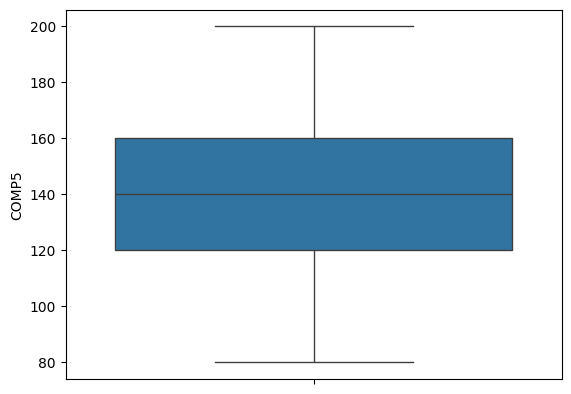

In [ ]:
sns.boxplot(y="COMP5", data = colegioy);

4) Analisar Normalidade

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [173]:
import scipy.stats as stats

In [175]:
# Teste Shapiro-Wilk
stats.shapiro(colegioy.COMP3)[1]

np.float64(0.02115194106153452)

In [177]:
# import statsmodels
# from statsmodels.stats.diagnostic import lilliefors
# ja foi importado nas aualas anteriores

In [178]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegioy.COMP3, dist = 'norm')[1]

np.float64(0.0022752873084563707)

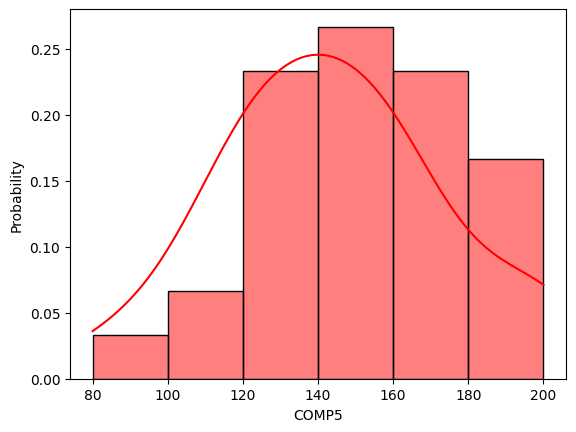

In [179]:
import seaborn as sns
sns.histplot(colegioy, x='COMP5', bins=6, color="red", kde=True, stat="probability");

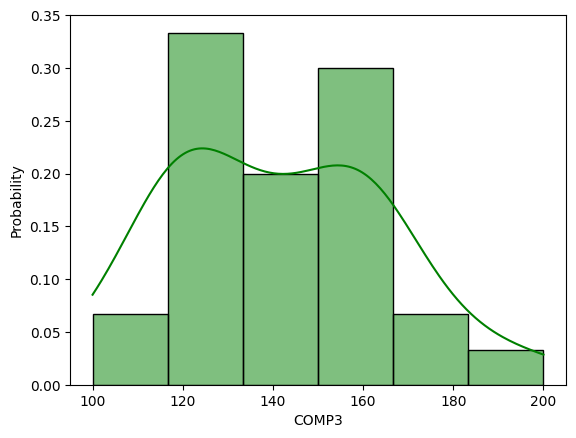

In [180]:
sns.histplot(colegioy, x='COMP3', bins=6, color="green", kde=True, stat="probability");

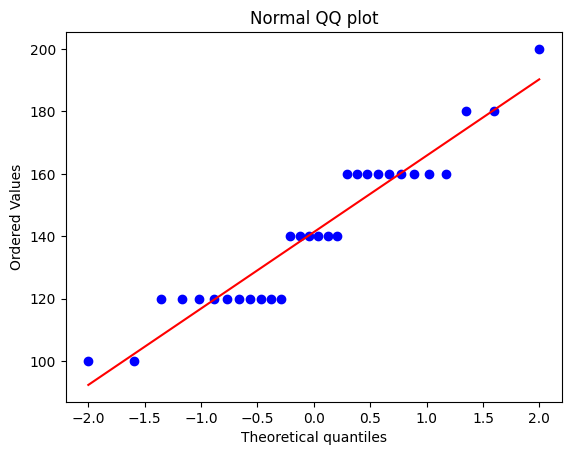

In [181]:
stats.probplot(colegioy['COMP3'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

5) HOMOGENEIDADE DAS VARIÂNCIAS (HOMOCEDASTICIDADE)

Variabilidade dos erros constante.

Ho = variâncias homogêneas : p > 0.05

Ha = variâncias não homogêneas : p <= 0.05

In [182]:
# teste de Levene
from scipy.stats import levene

In [183]:
stat, p = levene(colegioy.COMP3, colegioy.COMP5, center='mean')
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 0.61
p-valor: 0.4382667191


**TESTE T-student**

Comparação das Médias das notas dos componentes 3 e 5 da redação do colégio Y.

Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES : p <= 0.05

In [ ]:
# import scipy.stats as stats

In [184]:
stat, p = stats.ttest_ind(colegioy['COMP3'], colegioy['COMP5'], equal_var=True)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: -0.38
p-valor: 0.7073512583


In [186]:
colegioy.COMP3.describe()

count     30.000000
mean     141.333333
std       24.597916
min      100.000000
25%      120.000000
50%      140.000000
75%      160.000000
max      200.000000
Name: COMP3, dtype: float64

In [187]:
colegioy.COMP5.describe()

count     30.000000
mean     144.000000
std       29.896373
min       80.000000
25%      120.000000
50%      140.000000
75%      160.000000
max      200.000000
Name: COMP5, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: -0,38

p_valor = 0,707

Conclusão: Estatisticamente, com intervalo de confiança de 95%, a média do componente 3 de redação não é diferente da média do componente 5 com relação ao colegio y. 



### TESTE Z para duas amostras independentes 

Número de amostras maior ou igual a 30.

Necessita conhecimento do desvio padrão.

Objetivo:
Analisar a diferença entre as médias de mulheres e homens para a nota de um dos componentes de redação do colégio x.






In [190]:
colegiox = df.loc[df['CO_ESCOLA'] == 35017632.0]
colegiox.shape

(41, 28)

In [87]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [191]:
colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']

In [192]:
colegiox_mulher.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim
84,"1,90E+11",Águas de Lindóia,19,F,1,branca,1,2,pública,35017632.0,...,420.6,Espanhol,1.0,140.0,40.0,40.0,120.0,20.0,360.0,Sim
91,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,537.9,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim


In [193]:
colegiox_mulher.shape

(28, 28)

In [194]:
colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']

In [195]:
colegiox_homem.shape

(13, 28)

In [196]:
colegiox_homem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
85,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,508.2,Espanhol,1.0,140.0,140.0,120.0,160.0,120.0,680.0,Sim
108151,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,705.3,Inglês,1.0,140.0,160.0,120.0,140.0,100.0,660.0,Sim
182519,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,480.9,Espanhol,1.0,100.0,120.0,100.0,100.0,100.0,520.0,Sim


PASSOS
1) Analisar a classificação das variáveis

In [197]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [198]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

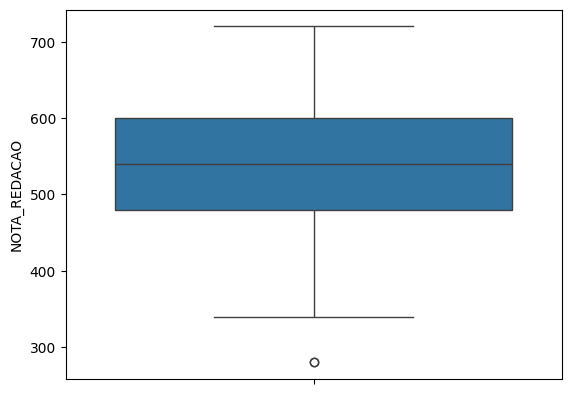

In [199]:
# import plotly.express as px
sns.boxplot( y = 'NOTA_REDACAO', data= notas_colegiox);

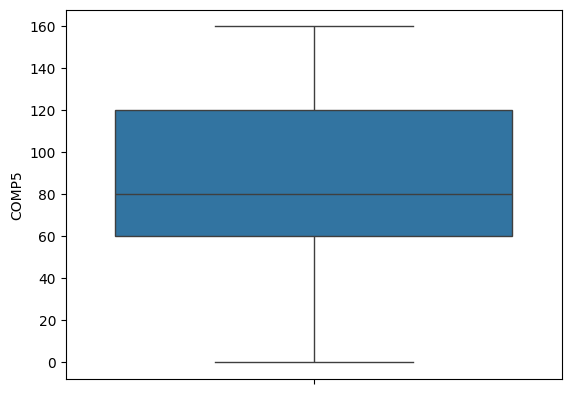

In [200]:
sns.boxplot( y="COMP5", data= colegiox_mulher);

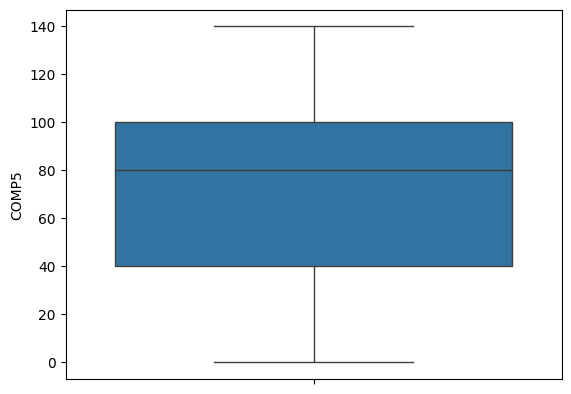

In [201]:
sns.boxplot( y="COMP5", data= colegiox_homem);

4) Analisar Normalidade

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [202]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_mulher.COMP5)

ShapiroResult(statistic=np.float64(0.952120722128433), pvalue=np.float64(0.22389914877149802))

In [203]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_homem.COMP5)

ShapiroResult(statistic=np.float64(0.9423077907693187), pvalue=np.float64(0.4874732021763525))

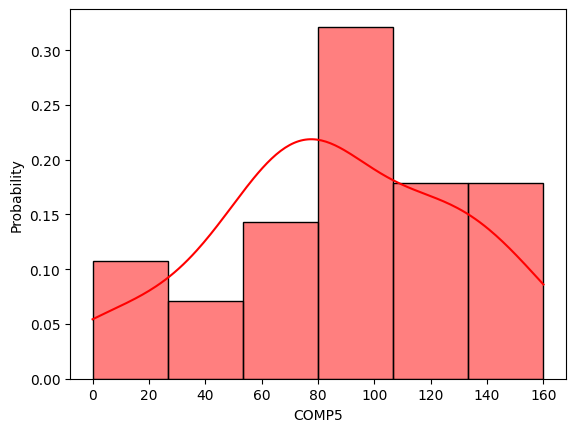

In [204]:
# import seaborn as sns
sns.histplot(colegiox_mulher, x='COMP5', bins=6, color="red", kde=True, stat="probability");

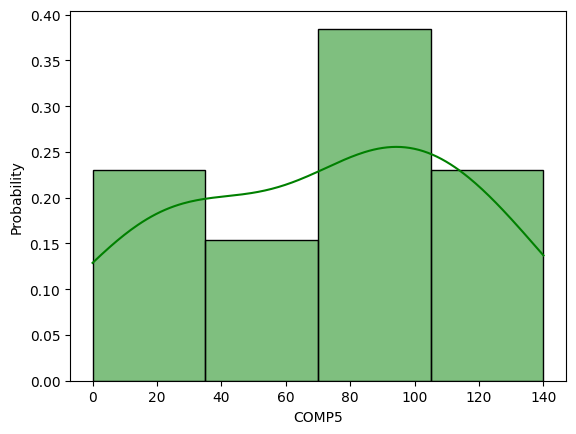

In [205]:
sns.histplot(colegiox_homem, x='COMP5', bins=4, color="green", kde=True, stat="probability");

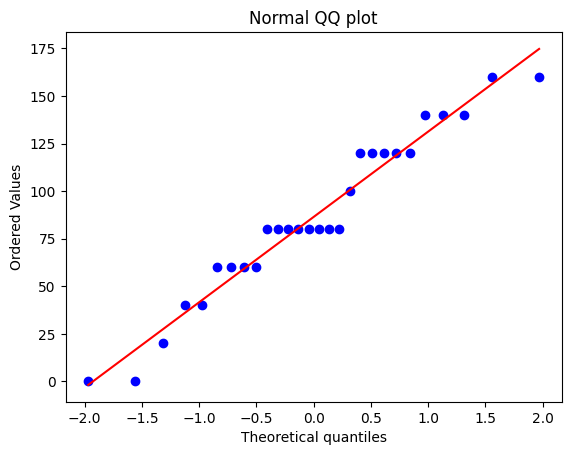

In [206]:
stats.probplot(colegiox_mulher['COMP5'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

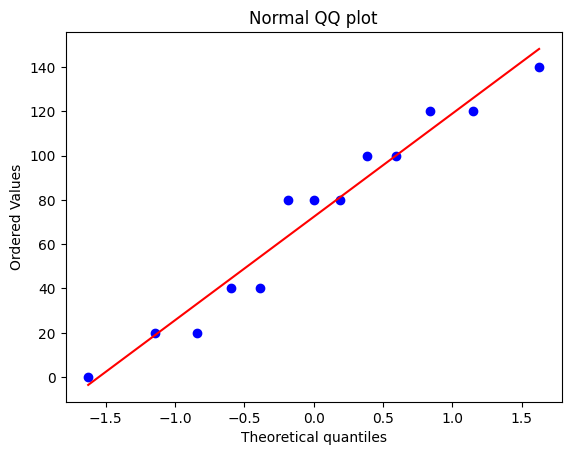

In [207]:
stats.probplot(colegiox_homem['COMP5'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

5) HOMOGENEIDADE DAS VARIÂNCIAS (HOMOCEDASTICIDADE)

Variabilidade dos erros constante.

Ho = variâncias homogêneas : p > 0.05

Ha = variâncias não homogêneas : p <= 0.05

In [208]:
stat, p = levene(colegiox_mulher.COMP5, colegiox_homem.COMP5, center='mean')
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 0.07
p-valor: 0.7899416696


**TESTE Z para duas amostras independentes**

Comparação das Médias das notas do componente 5 da redação entre homens e mulheres do colégio X.

Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS ENTRE HOMENS E MULHERES : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS ENTRE HOMENS E MULHERES : p <= 0.05

In [209]:
from statsmodels.stats.weightstats import ztest

In [210]:
stat, p = ztest(colegiox_mulher.COMP5, colegiox_homem.COMP5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 0.96
p-valor: 0.3394918950042334


In [211]:
colegiox_mulher.COMP5.describe()

count     28.000000
mean      86.428571
std       43.903453
min        0.000000
25%       60.000000
50%       80.000000
75%      120.000000
max      160.000000
Name: COMP5, dtype: float64

In [212]:
colegiox_homem.COMP5.describe()

count     13.000000
mean      72.307692
std       44.376016
min        0.000000
25%       40.000000
50%       80.000000
75%      100.000000
max      140.000000
Name: COMP5, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: 0,96

p_valor = 0,339

Conclusão: Estatisticamente, com intervalo de confiança de 95%, não se pode concluir que a média do componente 5 de redação do colegio X seja diferente entre homens e mulheres.



### TESTE MANN WHITNEY (soma de postos de Wilcoxon) 

Teste Não paramétrico

Duas amostras independentes 


Objetivo:
Analisar a diferença entre as MEDIANAS de mulheres e homens para as notas do colégio x.






Mesmo exemplo do passado, vou comentar

In [ ]:
# colegiox = df.loc[df['CO_ESCOLA'] == 35017632.0]
# colegiox.shape
# colegiox.head()


# Amostras  - Mulher

# colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']
# colegiox_mulher.head()
# colegiox_mulher.shape

In [ ]:
# Amostras  - Homem

# colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']
# colegiox_homem.shape
# colegiox_homem.head()

1) Analisar a classificação das variáveis (feito anteriormente)

In [ ]:
# colegiox.dtypes

2) Analisar valores missing (feito anteriormente)

In [121]:
# colegiox.isnull().sum()

3) Analisar Normalidade

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [213]:
# Teste Shapiro-Wilk - MATEMÁTICA
stats.shapiro(colegiox_mulher.NOTA_MT)

ShapiroResult(statistic=np.float64(0.7194503317423839), pvalue=np.float64(5.43062371248103e-06))

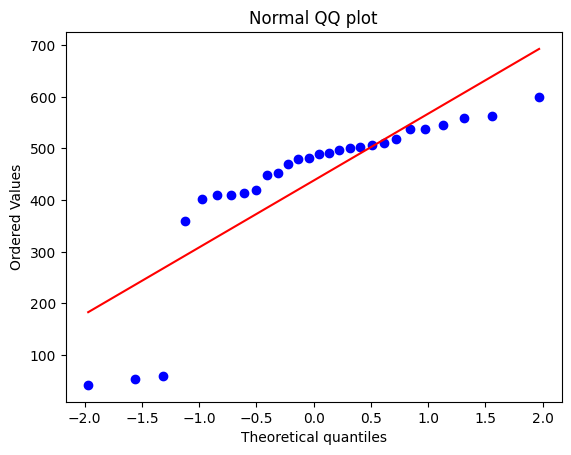

In [214]:
stats.probplot(colegiox_mulher['NOTA_MT'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [215]:
stats.shapiro(colegiox_homem.NOTA_MT)

ShapiroResult(statistic=np.float64(0.8659596767132199), pvalue=np.float64(0.046200901450484624))

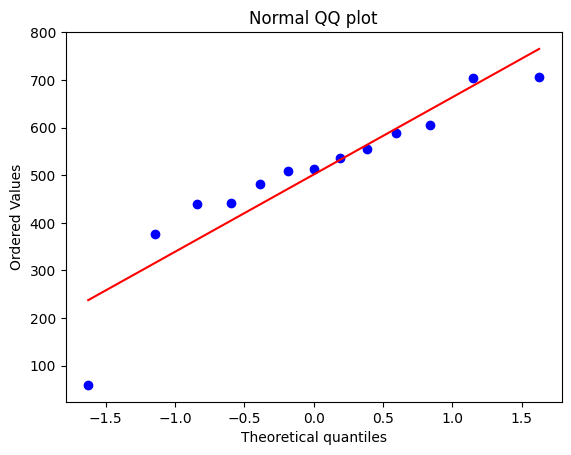

In [216]:
stats.probplot(colegiox_homem['NOTA_MT'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [217]:
# Teste Shapiro-Wilk - CIÊNCIAS DA NATUREZA
stats.shapiro(colegiox_mulher.NOTA_CN)

ShapiroResult(statistic=np.float64(0.7065987593026223), pvalue=np.float64(3.536284568027704e-06))

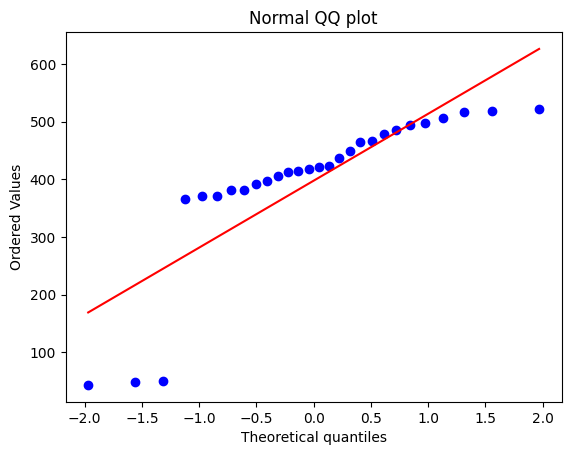

In [218]:
stats.probplot(colegiox_mulher['NOTA_CN'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [219]:
stats.shapiro(colegiox_homem.NOTA_CN)

ShapiroResult(statistic=np.float64(0.7647996673720012), pvalue=np.float64(0.0026814188647749284))

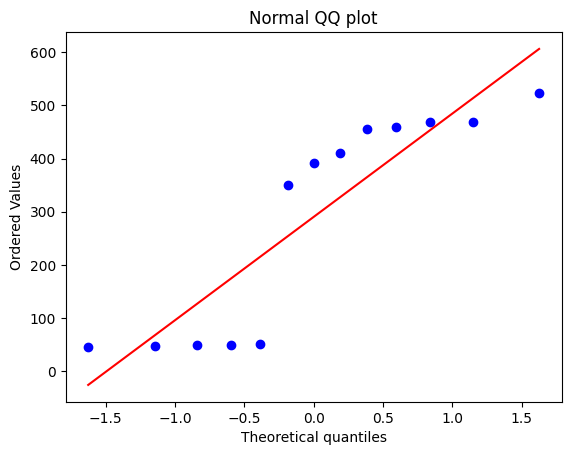

In [220]:
stats.probplot(colegiox_homem['NOTA_CN'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**TESTE MANN WHITNEY**

Comparação das medianas das notas homens e mulheres do colégio X.

Ho = NÃO HÁ DIFERENÇA ENTRE AS MEDIANAS DAS NOTAS DE HOMENS E MULHERES : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MEDIANAS DAS NOTAS ENTRE HOMENS E MULHERES : p <= 0.05

In [ ]:
# import scipy.stats as stats

In [221]:
stat, p = stats.mannwhitneyu(colegiox_mulher.NOTA_MT, colegiox_homem.NOTA_MT)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 127.0
p-valor: 0.12678483629218537


In [222]:
stat, p = stats.mannwhitneyu(colegiox_mulher.NOTA_CN, colegiox_homem.NOTA_CN)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 228.0
p-valor: 0.20239601597295886


In [223]:
colegiox_mulher.NOTA_MT.describe()

count     28.000000
mean     437.928571
std      146.875707
min       42.400000
25%      413.375000
50%      485.150000
75%      512.550000
max      599.500000
Name: NOTA_MT, dtype: float64

In [224]:
colegiox_homem.NOTA_MT.describe()

count     13.000000
mean     501.515385
std      164.496808
min       59.500000
25%      442.600000
50%      513.900000
75%      588.800000
max      705.700000
Name: NOTA_MT, dtype: float64

In [225]:
colegiox_mulher.NOTA_CN.describe()

count     28.000000
mean     397.785714
std      132.791189
min       43.400000
25%      381.875000
50%      420.300000
75%      480.275000
max      521.600000
Name: NOTA_CN, dtype: float64

In [226]:
colegiox_homem.NOTA_CN.describe()

count     13.000000
mean     290.130769
std      202.857069
min       46.300000
25%       49.800000
50%      391.500000
75%      460.200000
max      523.100000
Name: NOTA_CN, dtype: float64

In [ ]:
# import plotly.express as px

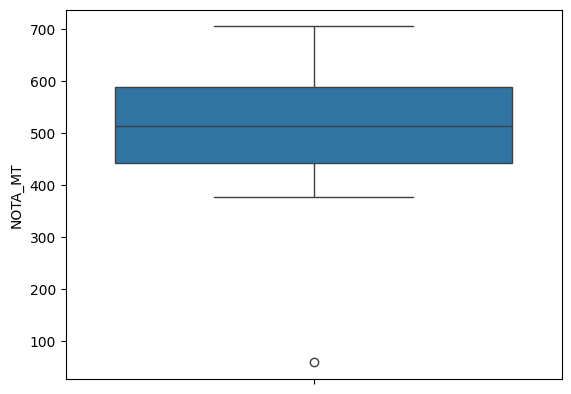

In [227]:
sns.boxplot( y="NOTA_MT", data= colegiox_homem);


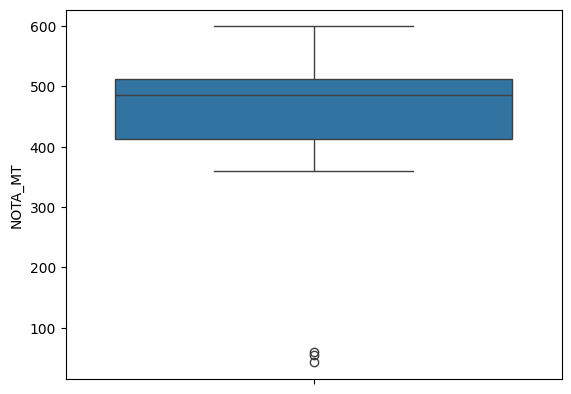

In [228]:
sns.boxplot( y="NOTA_MT", data= colegiox_mulher);

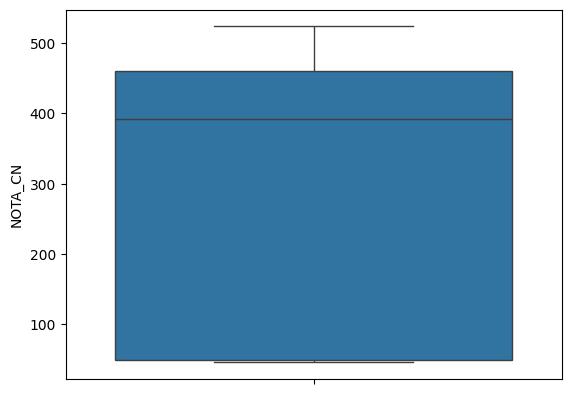

In [229]:
sns.boxplot( y="NOTA_CN", data= colegiox_homem);

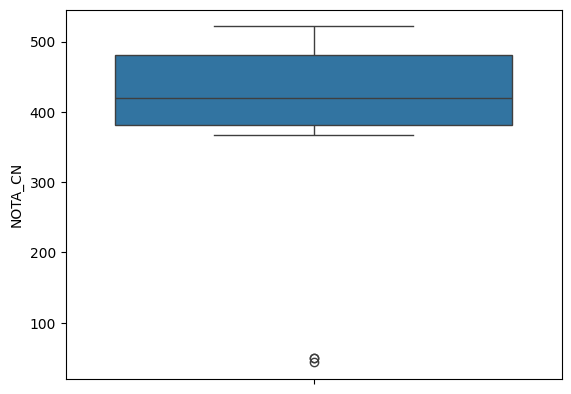

In [230]:
sns.boxplot( y="NOTA_CN", data= colegiox_mulher);

**Conclusão:** Estatisticamente, com intervalo de confiança de 95%, não se pode concluir que a mediana das notas de Matemática e Ciências da natureza do colegio X sejam diferentes entre homens e mulheres.



### TESTE T pareado (duas amostras dependentes) 

Teste paramétrico

Objetivo:
Analisar a diferença média da nota de redação com relação aos seus componentes.

**Obs.:** amostras independentes = analisa diferença nas médias. 

amostras dependentes = analisa a diferença média.






In [233]:
colegioy = df.loc[df.CO_ESCOLA == 35151506.0]

In [234]:
colegioy.shape

(30, 28)

In [235]:
colegioy.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35151506.0,...,64.0,Inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,Sim
7910,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35151506.0,...,699.5,Inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,Sim
14367,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,780.2,Inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,Sim
22519,"1,90E+11",São Paulo,17,F,1,preta,1,2,privada,35151506.0,...,732.2,Inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,Sim
58184,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,756.3,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


PASSOS
1) Analisar a classificação das variáveis

In [236]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [237]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

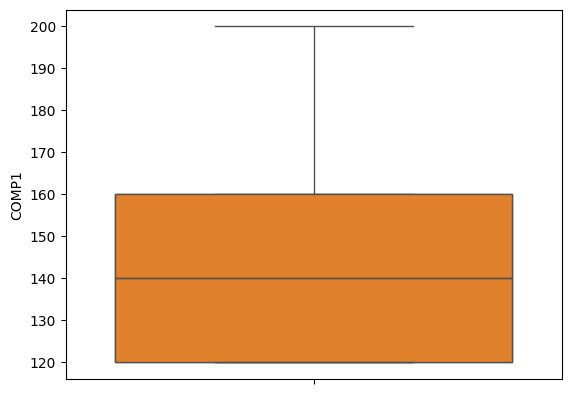

In [ ]:
# Fazer o Boxplot para cada uma das componentes da nota de redação e para a nota de redação.

sns.boxplot(y='COMP1', data=colegioy);


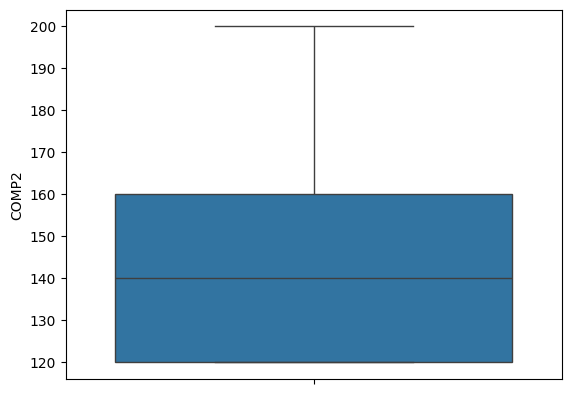

In [248]:
sns.boxplot(y='COMP2', data=colegioy);

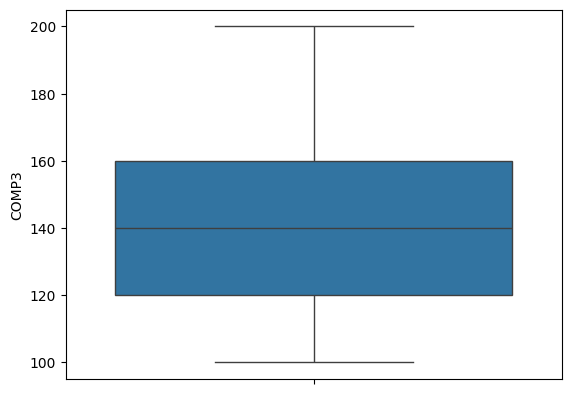

In [249]:
sns.boxplot(y='COMP3', data=colegioy);

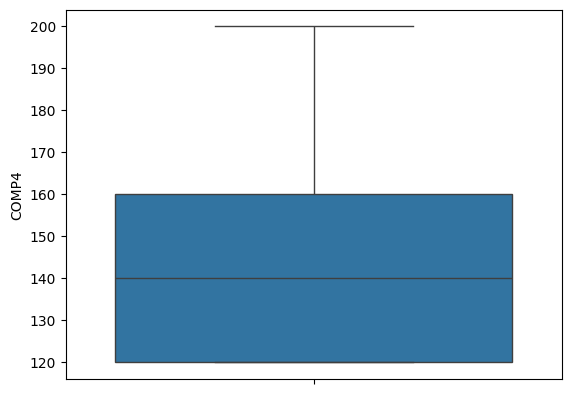

In [250]:
sns.boxplot(y='COMP4', data=colegioy);

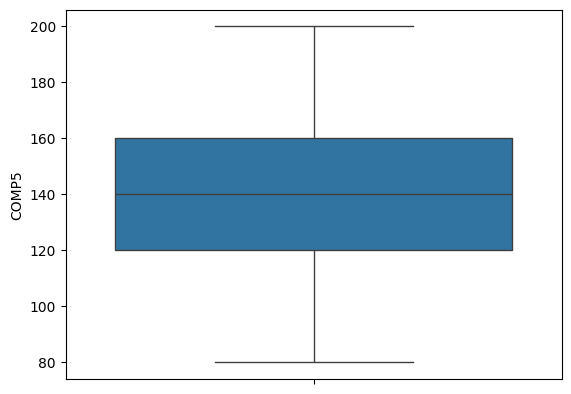

In [251]:
sns.boxplot(y='COMP5', data=colegioy);

4) Analisar Normalidade

A diferença entre as variáveis é que deve ser normal.

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [252]:
diferenca1 = colegioy['NOTA_REDACAO'] - colegioy['COMP1']
diferenca2 = colegioy['NOTA_REDACAO'] - colegioy['COMP2']
diferenca3 = colegioy['NOTA_REDACAO'] - colegioy['COMP3']
diferenca4 = colegioy['NOTA_REDACAO'] - colegioy['COMP4']
diferenca5 = colegioy['NOTA_REDACAO'] - colegioy['COMP5']

In [256]:
# Teste Shapiro-Wilk (para cada uma das diferenças)
print(f'Diferença1 p-valor: {stats.shapiro(diferenca1)[1]}')
print(f'Diferença2 p-valor: {stats.shapiro(diferenca2)[1]}')
print(f'Diferença3 p-valor: {stats.shapiro(diferenca3)[1]}')
print(f'Diferença4 p-valor: {stats.shapiro(diferenca4)[1]}')
print(f'Diferença5 p-valor:{stats.shapiro(diferenca4)[1]}')


Diferença1 p-valor: 0.027671497065813403
Diferença2 p-valor: 0.16300093270098187
Diferença3 p-valor: 0.024712354099491223
Diferença4 p-valor: 0.014813036329987412
Diferença5 p-valor:0.014813036329987412


**TESTE t**

Comparação das diferenças das Médias das notas de redação e de seus componentes que passaram no teste de normalidade.

Ho = NÃO HÁ DIFERENÇA ENTRE AS DIFERENÇAS DAS MÉDIAS DA REDAÇÃO COM OS SEUS COMPONENTES : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS DIFERENÇAS DAS MÉDIAS DA REDAÇÃO COM OS SEUS COMPONENTES : p <= 0.05

In [257]:
stat, p = stats.ttest_rel(diferenca1, diferenca2)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 0.17
p-valor: 0.8690991006


In [258]:
print(diferenca1.mean())

574.0


In [259]:
print(diferenca2.mean())

573.3333333333334


In [260]:
stat, p = stats.ttest_rel(colegioy.COMP1, colegioy.COMP2)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: -0.17
p-valor: 0.8690991006


**INTERPRETAÇÃO:**

Teste estatístico: 0,17

p_valor = 0,869

Conclusão: Estatisticamente, com intervalo de confiança de 95%, não há evidências para afirmar que existe diferença na diferença da média entre a redação e os seus componentes 1 e 2 do colegio y. 